# Import Statements

In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn



# Load Data sets

In [149]:
train_labels_df = pd.read_csv("../datasets/train_labels.csv")
train_values_df = pd.read_csv("../datasets/train_values.csv")
test_values_df = pd.read_csv("../datasets/test_values.csv")
submission_format_df = pd.read_csv("../datasets/submission_format.csv")

# Print The Datatypes for eact column

In [150]:
train_labels_df.dtypes

building_id     int64
damage_grade    int64
dtype: object

In [151]:
train_values_df.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [152]:
test_values_df.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [153]:
submission_format_df.dtypes

building_id     int64
damage_grade    int64
dtype: object

# Check for null values

In [154]:
train_values_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [155]:
test_values_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [156]:
train_labels_df.isnull().sum()

building_id     0
damage_grade    0
dtype: int64

# Merge train values and train data

In [157]:
train_df = train_values_df.merge(train_labels_df, on="building_id")

In [158]:
train_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [159]:
col_names = list(train_df.columns.values)
print(col_names)

['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police

# Damage grade frequency count.

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

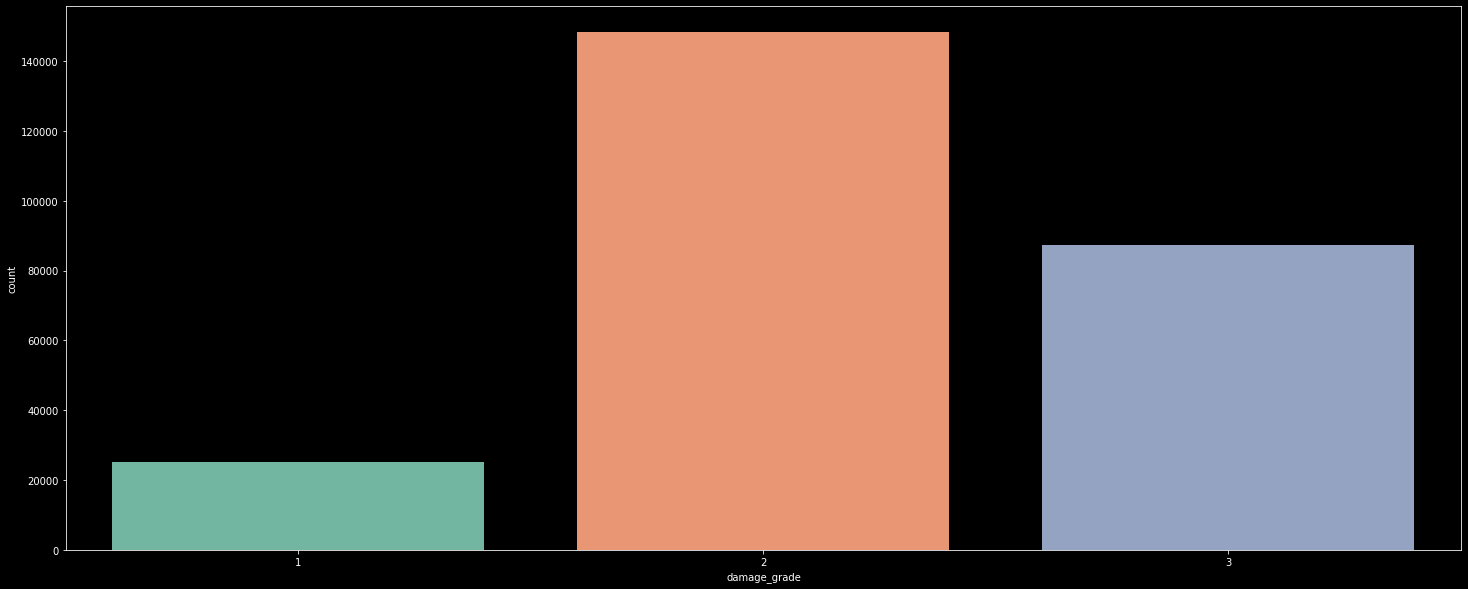

In [160]:
plt.figure(figsize=(25, 10))
sbn.countplot(train_df.damage_grade, palette="Set2")
train_df.damage_grade.value_counts()

# land_surface_condition vs damage_grade

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

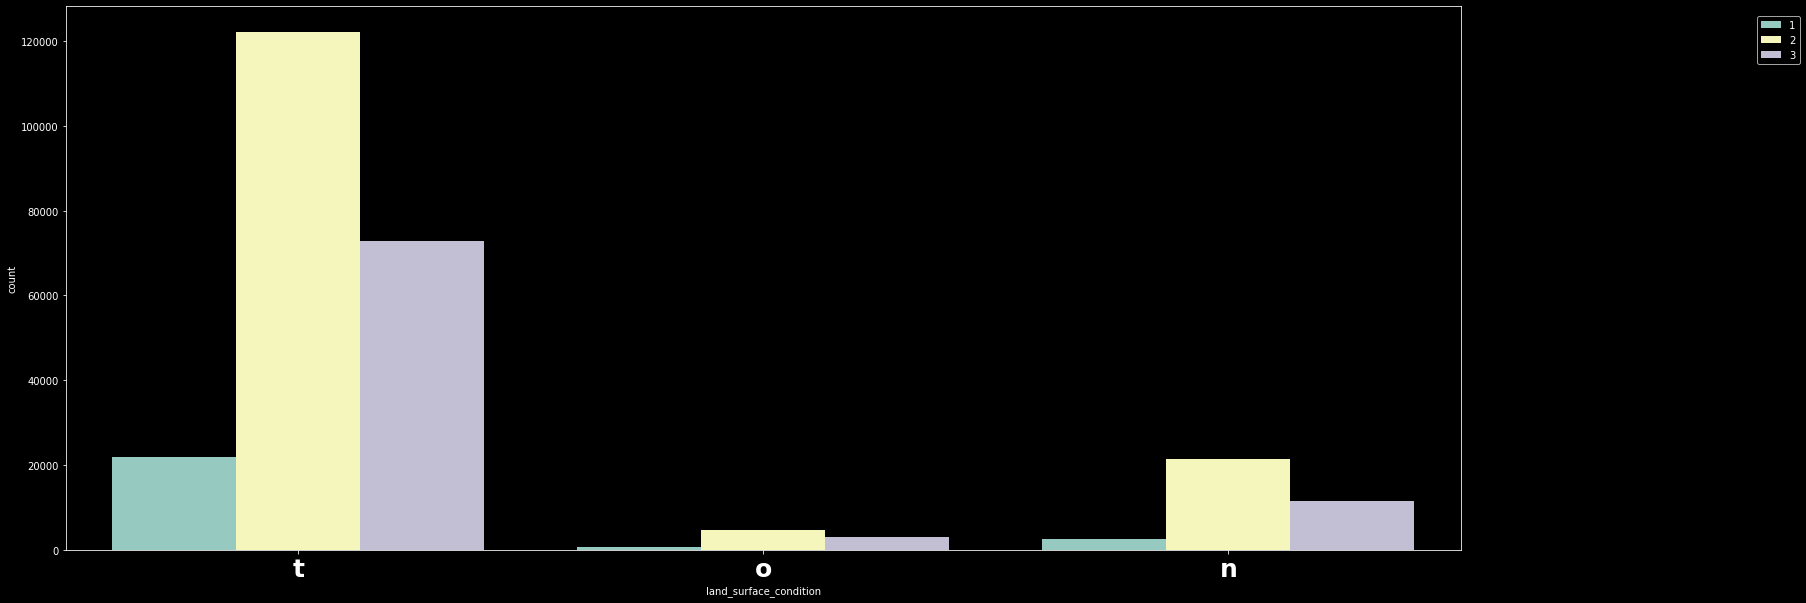

In [161]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='land_surface_condition', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.land_surface_condition.value_counts()

# Foundation type vs Damage Grade

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

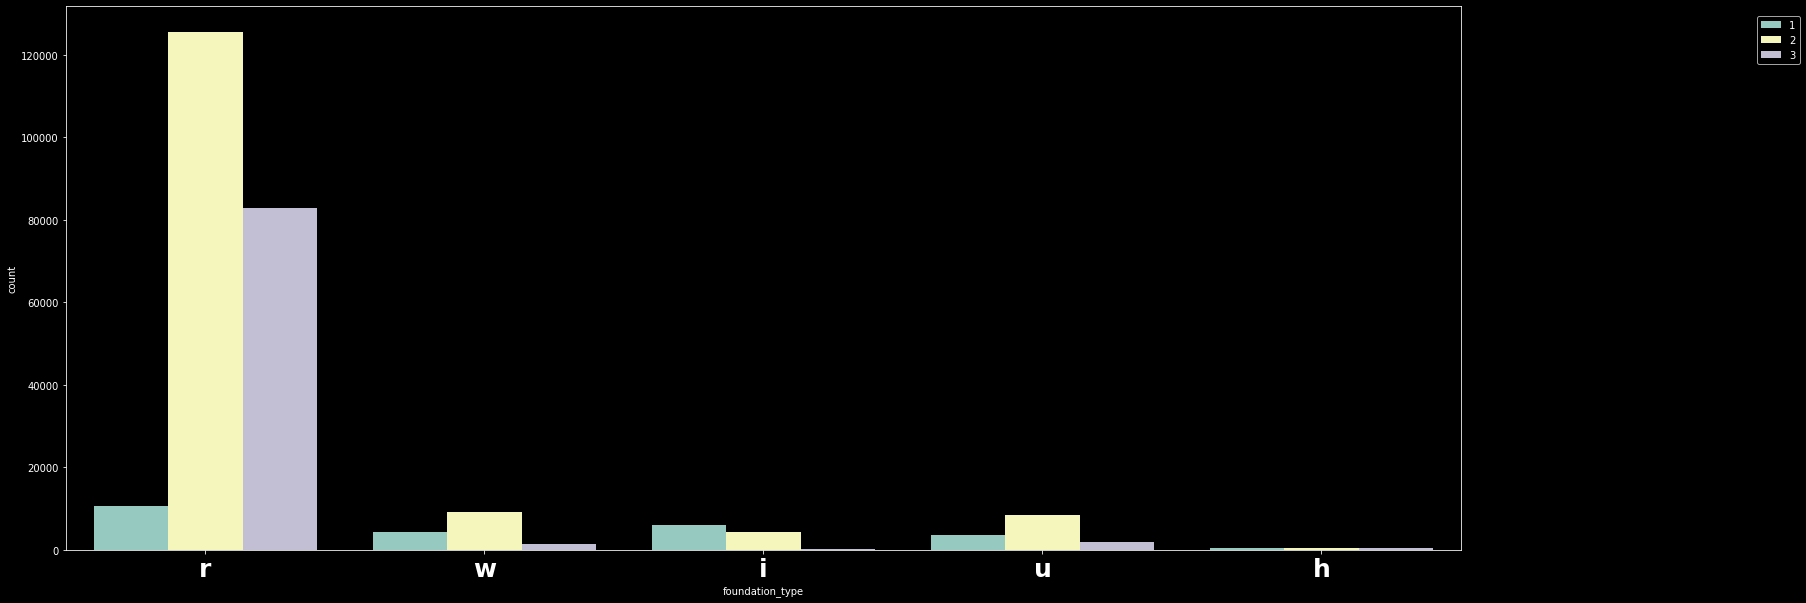

In [162]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='foundation_type', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.foundation_type.value_counts()

# Roof type vs Damage grade

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

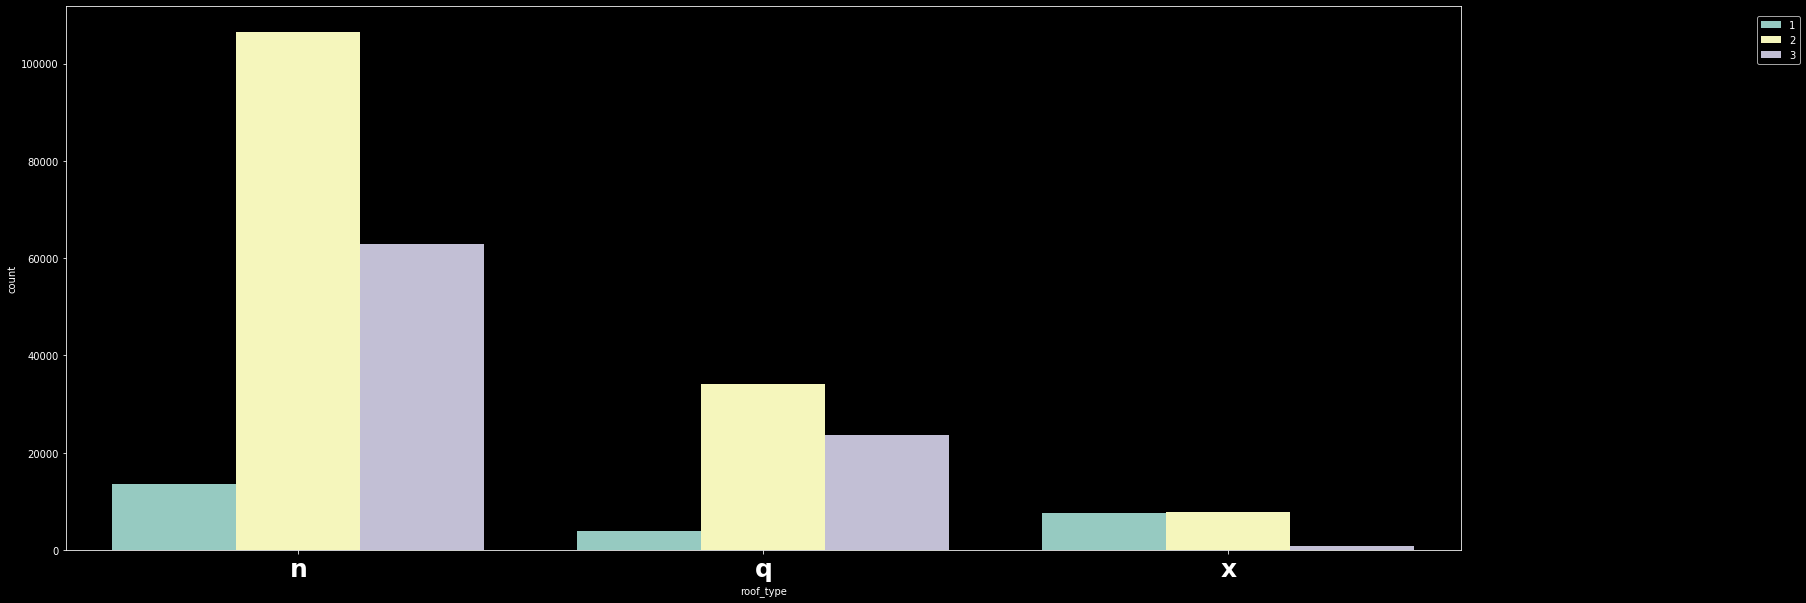

In [163]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='roof_type', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.roof_type.value_counts()

# Ground  floor Type vs Damage grade

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

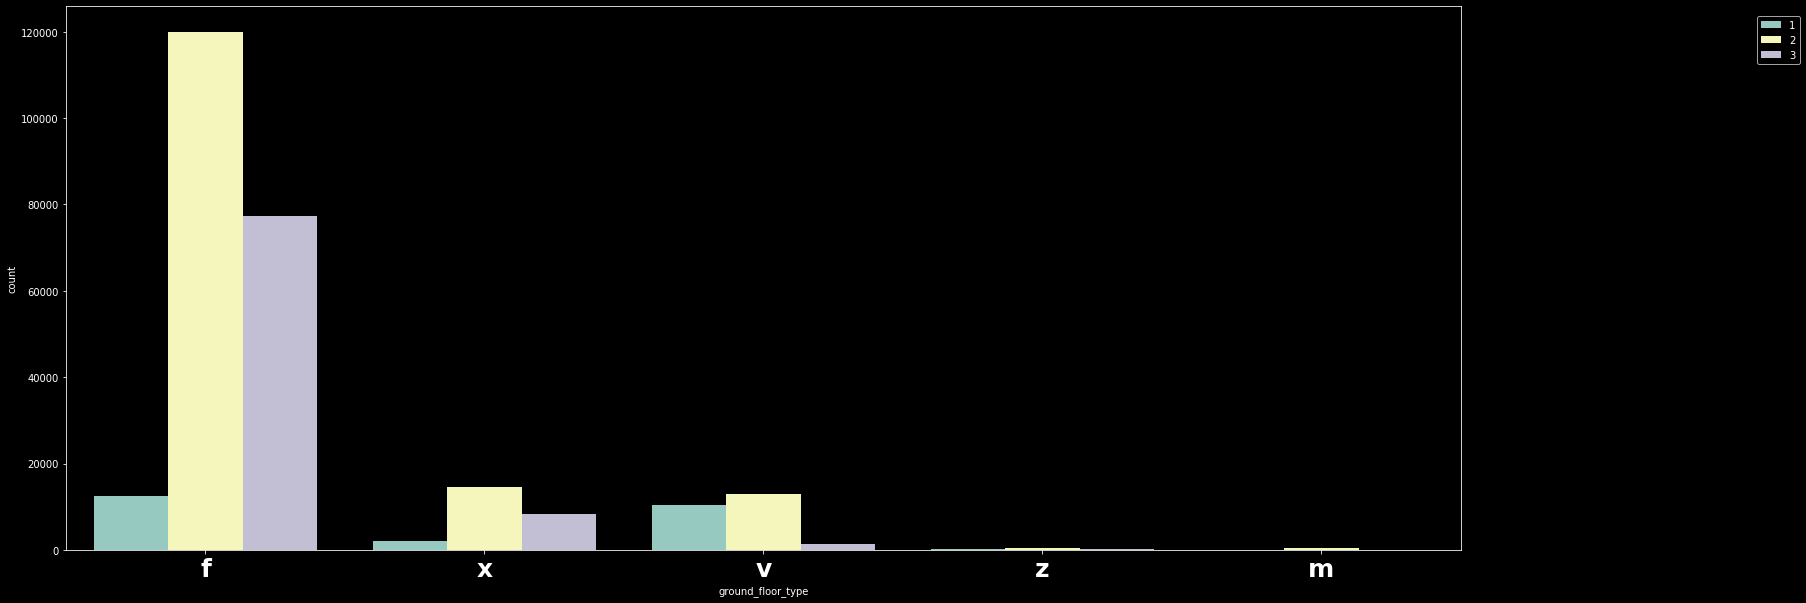

In [164]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='ground_floor_type', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.ground_floor_type.value_counts()

# Other floor type vs Damage grade

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

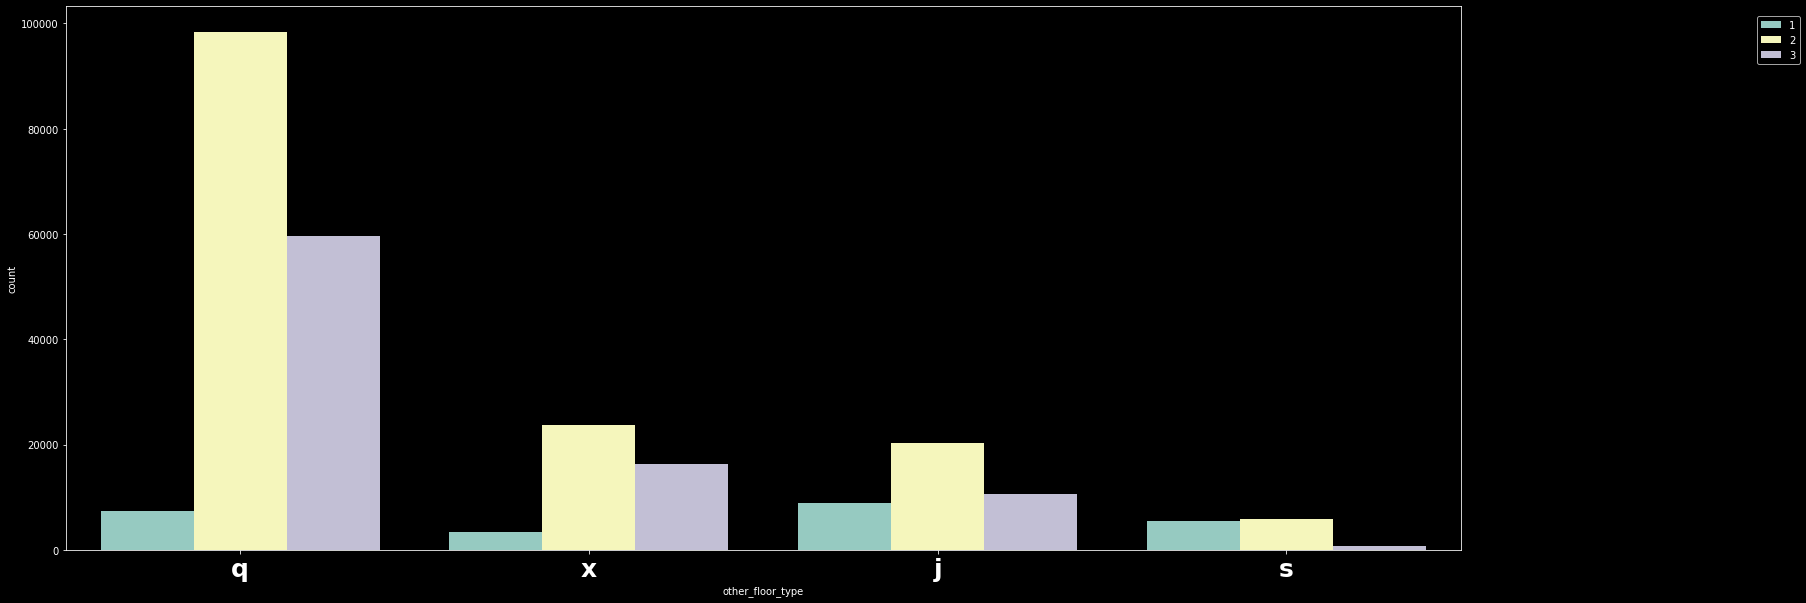

In [165]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='other_floor_type', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.other_floor_type.value_counts()

# Position vs Damage grade

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

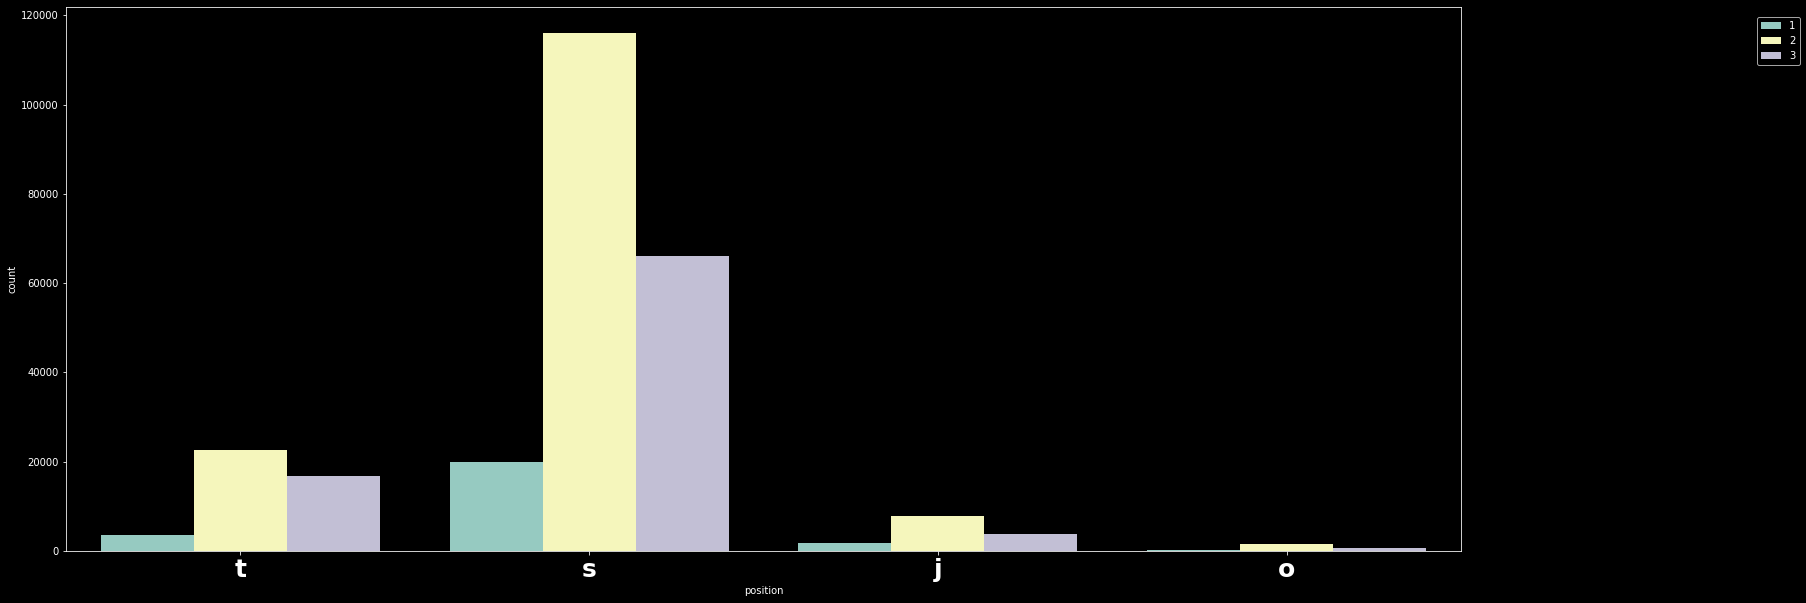

In [166]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='position', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.position.value_counts()

# Plan configuration vs Damage grade

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

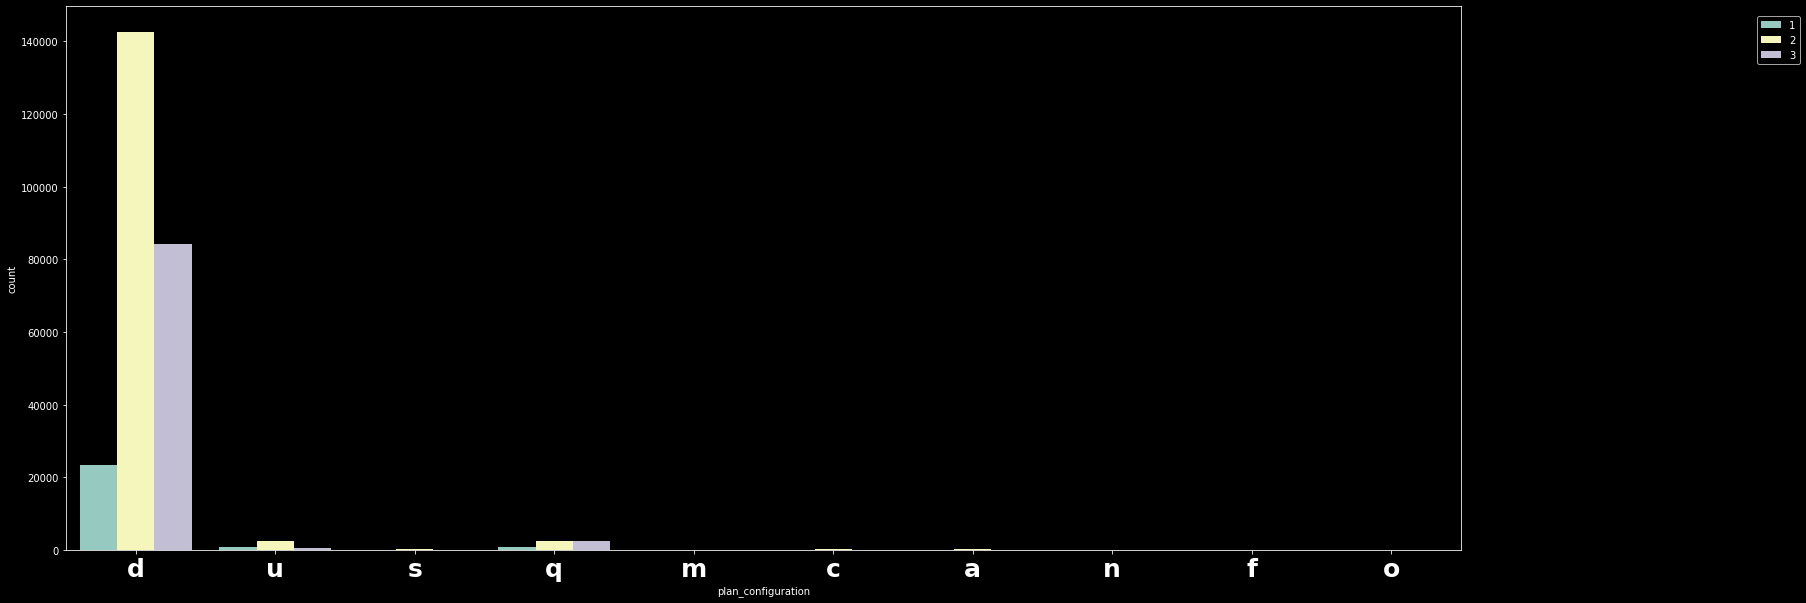

In [167]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='plan_configuration', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.plan_configuration.value_counts()

# Legal ownership stats vs damage grade

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

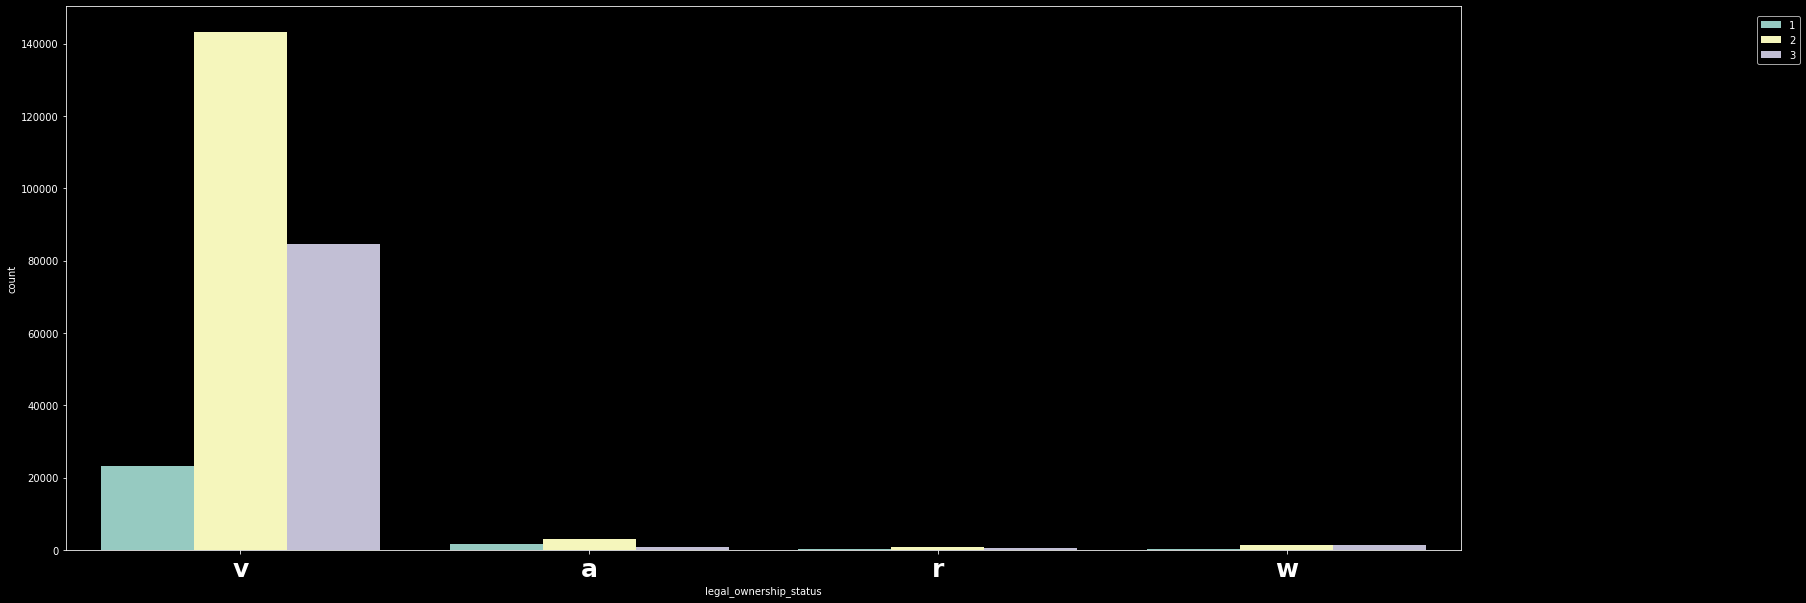

In [168]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='legal_ownership_status', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.legal_ownership_status.value_counts()

# Geo level Ids vs Damage Grade

(30, 13.900353413839548, 0)

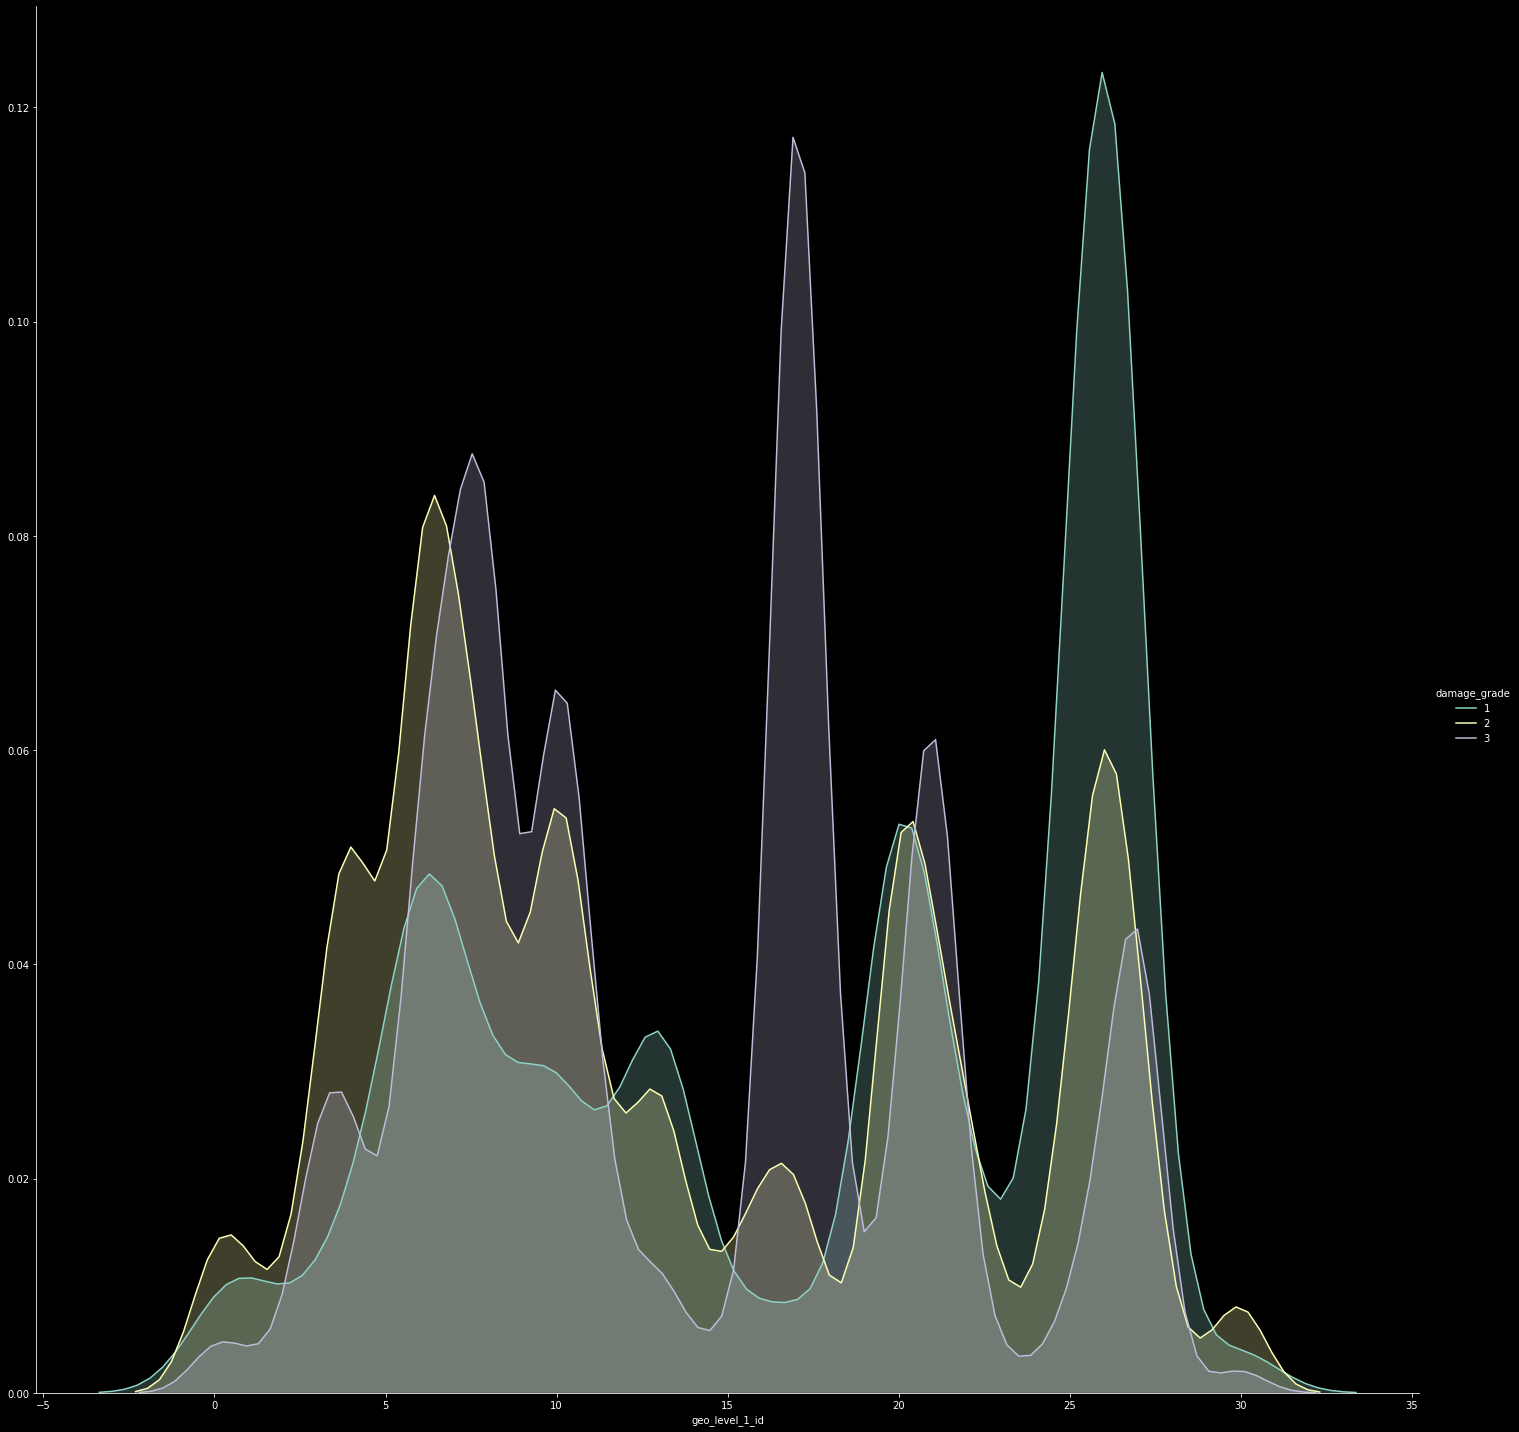

In [169]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=20)
  .map(sbn.kdeplot, 'geo_level_1_id', shade=True)
 .add_legend()
)
(train_df.geo_level_1_id.max(), train_df.geo_level_1_id.mean(), train_df.geo_level_1_id.min())


(1427, 701.0746850549307, 0)

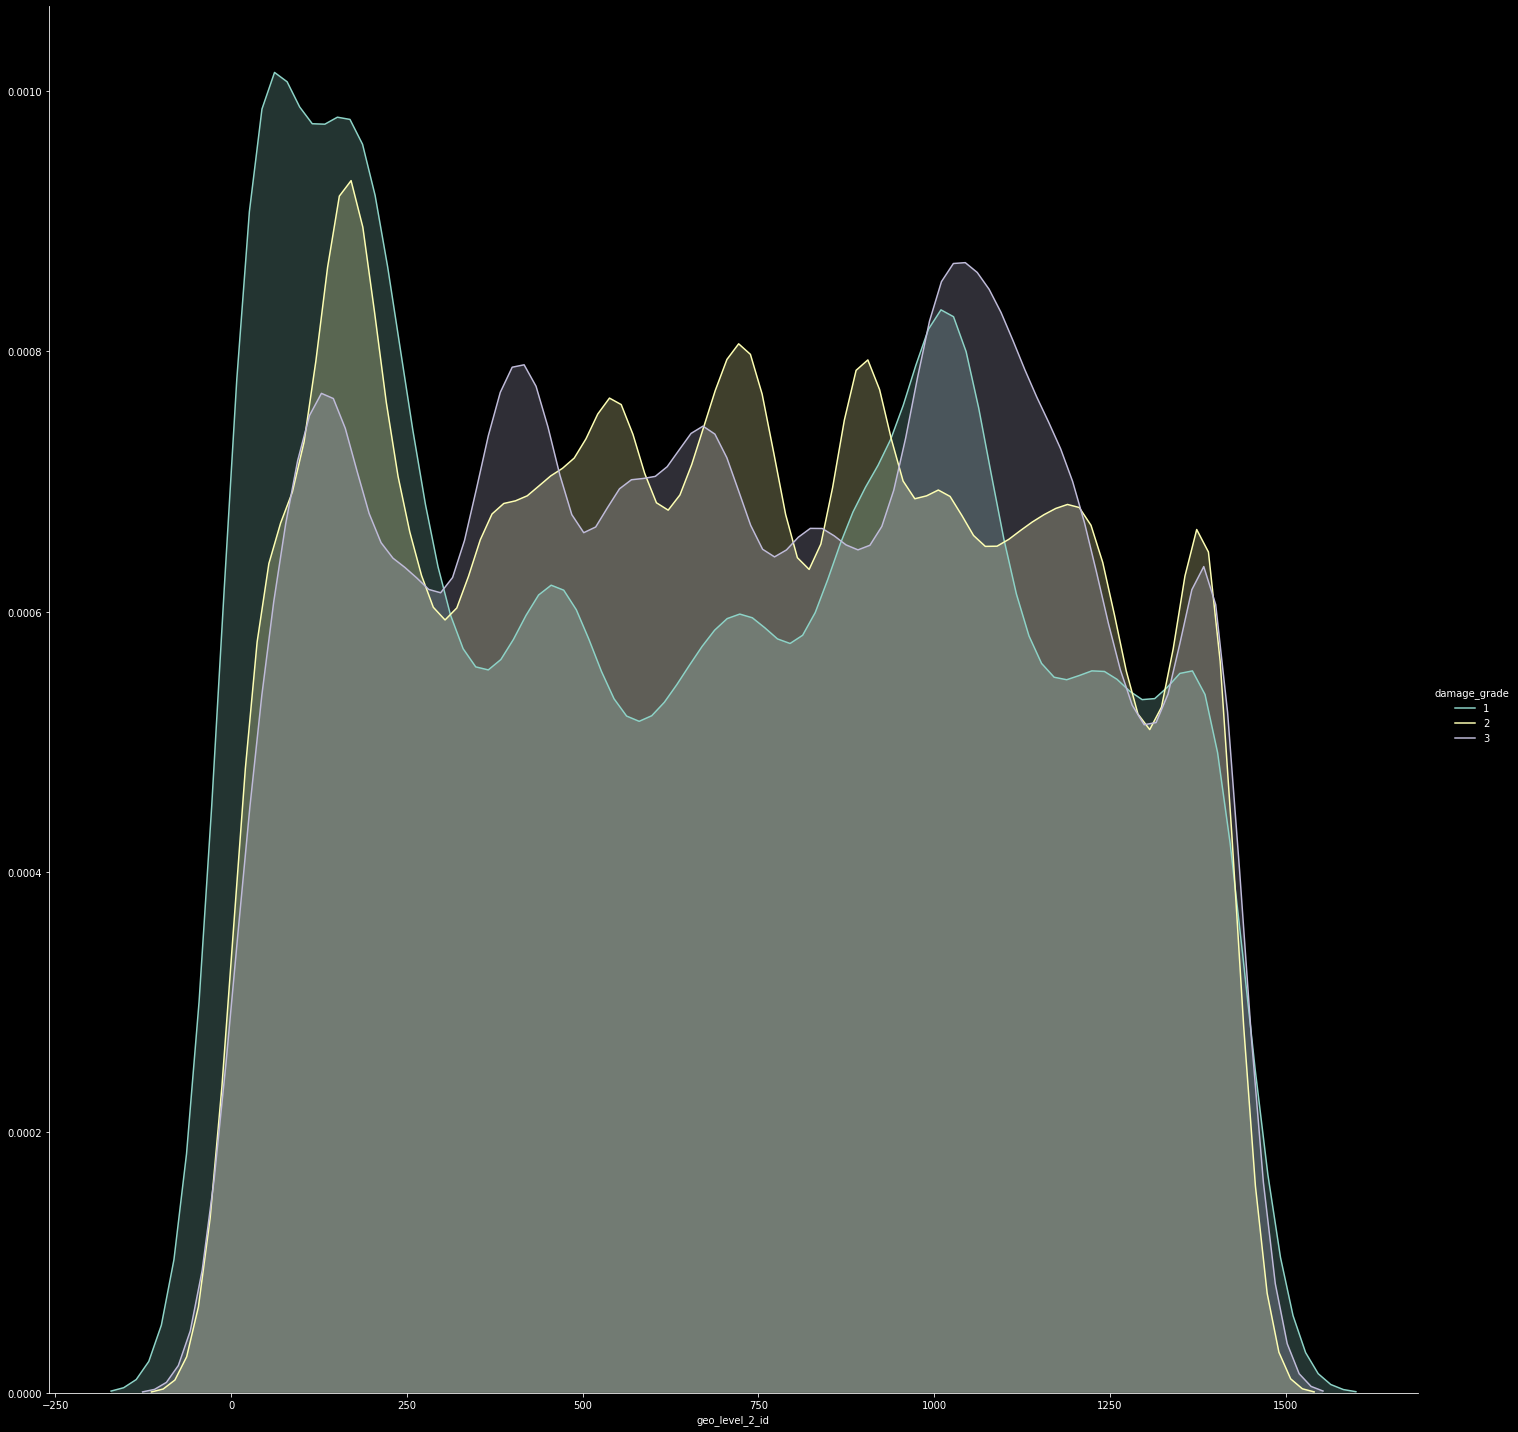

In [170]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=20)
  .map(sbn.kdeplot, 'geo_level_2_id', shade=True)
 .add_legend()
)
(train_df.geo_level_2_id.max(), train_df.geo_level_2_id.mean(), train_df.geo_level_2_id.min())


(12567, 6257.876147827522, 0)

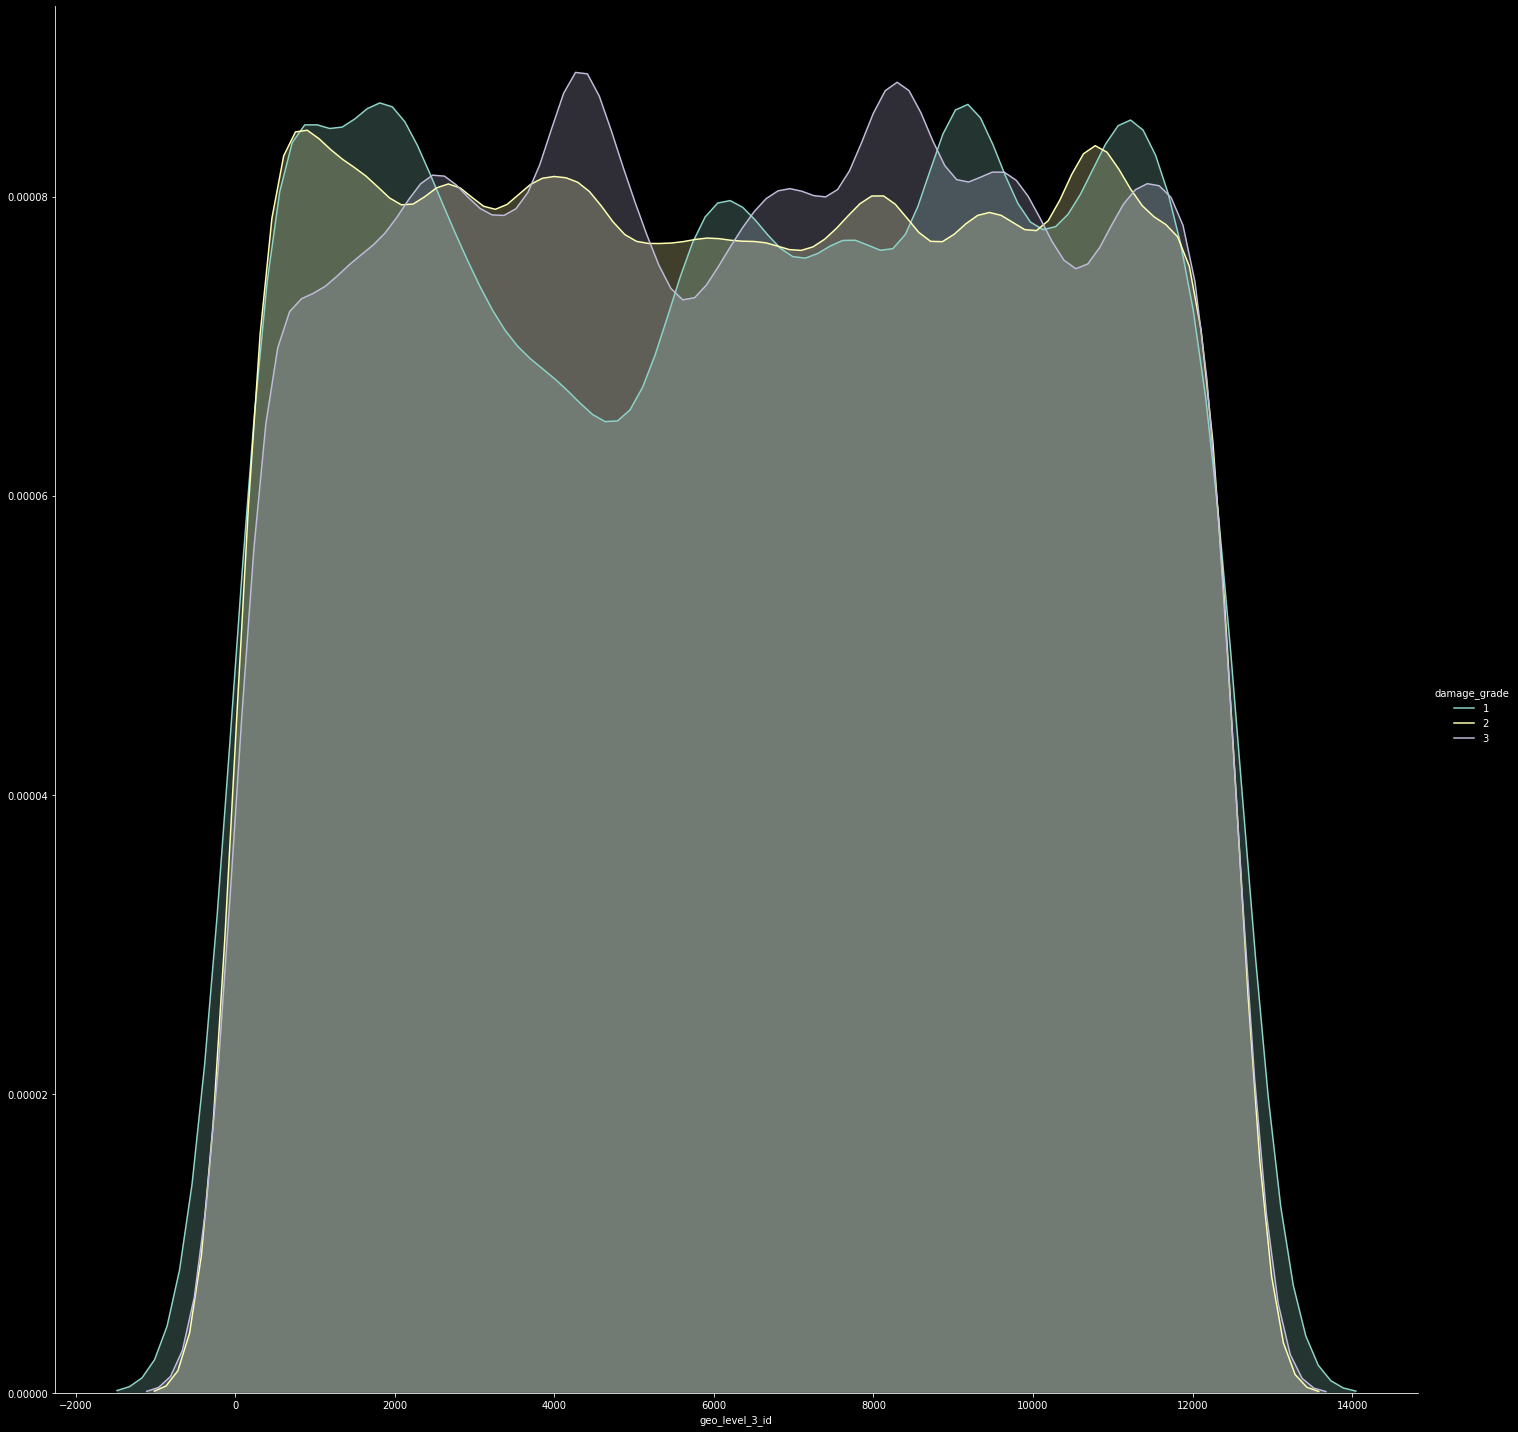

In [171]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=20)
  .map(sbn.kdeplot, 'geo_level_3_id', shade=True)
 .add_legend()
)
(train_df.geo_level_3_id.max(), train_df.geo_level_3_id.mean(), train_df.geo_level_3_id.min())


# Count floors pre eq vs Damage grade

(9, 2.1297232167182782, 1)

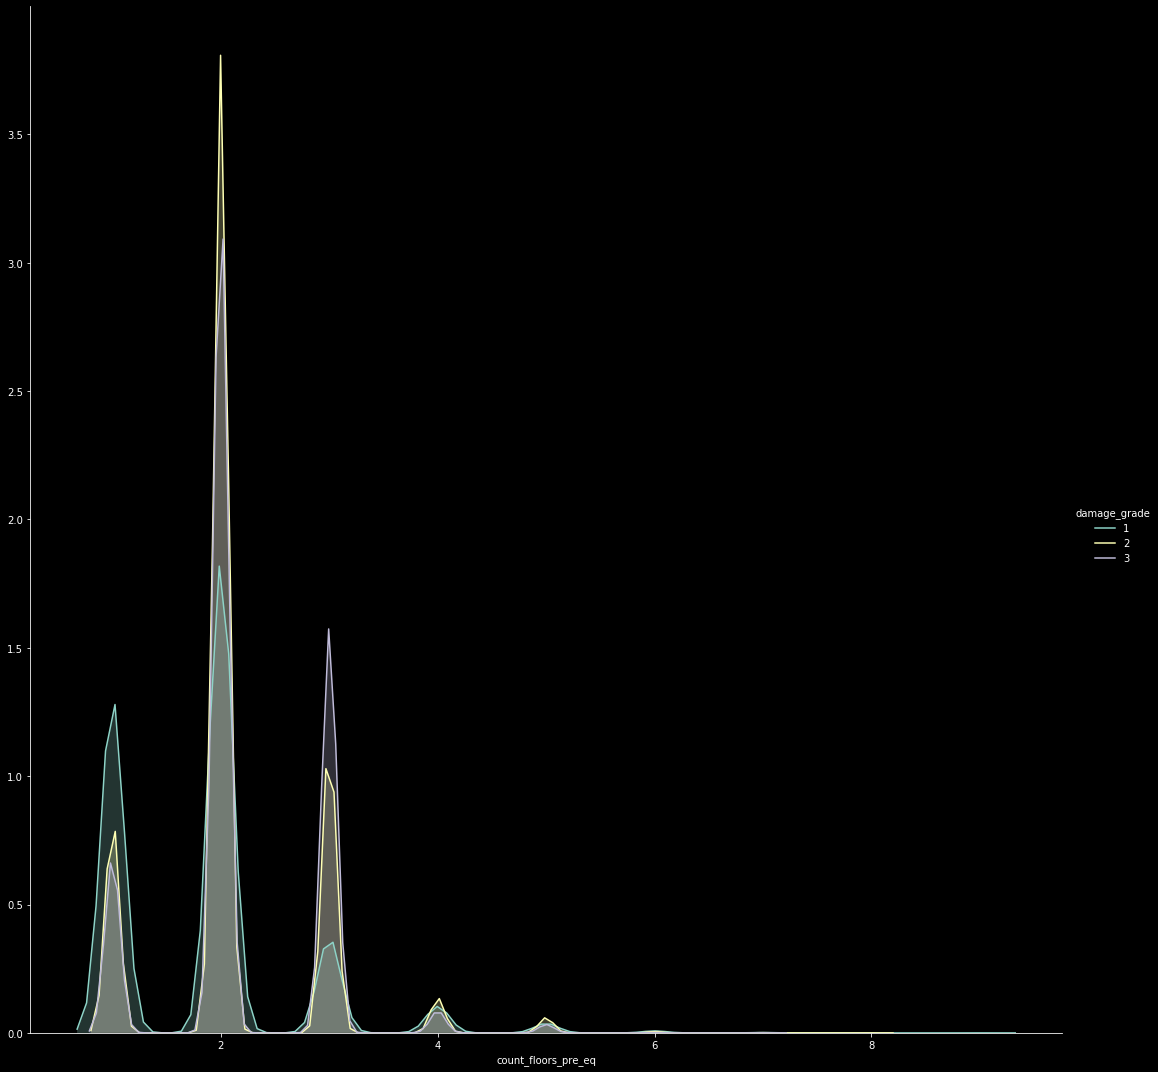

In [172]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=15)
  .map(sbn.kdeplot, 'count_floors_pre_eq', shade=True)
 .add_legend()
)
(train_df.count_floors_pre_eq.max(), train_df.count_floors_pre_eq.mean(), train_df.count_floors_pre_eq.min())


# Age vs Damage grade

(995, 26.535028645323695, 0)

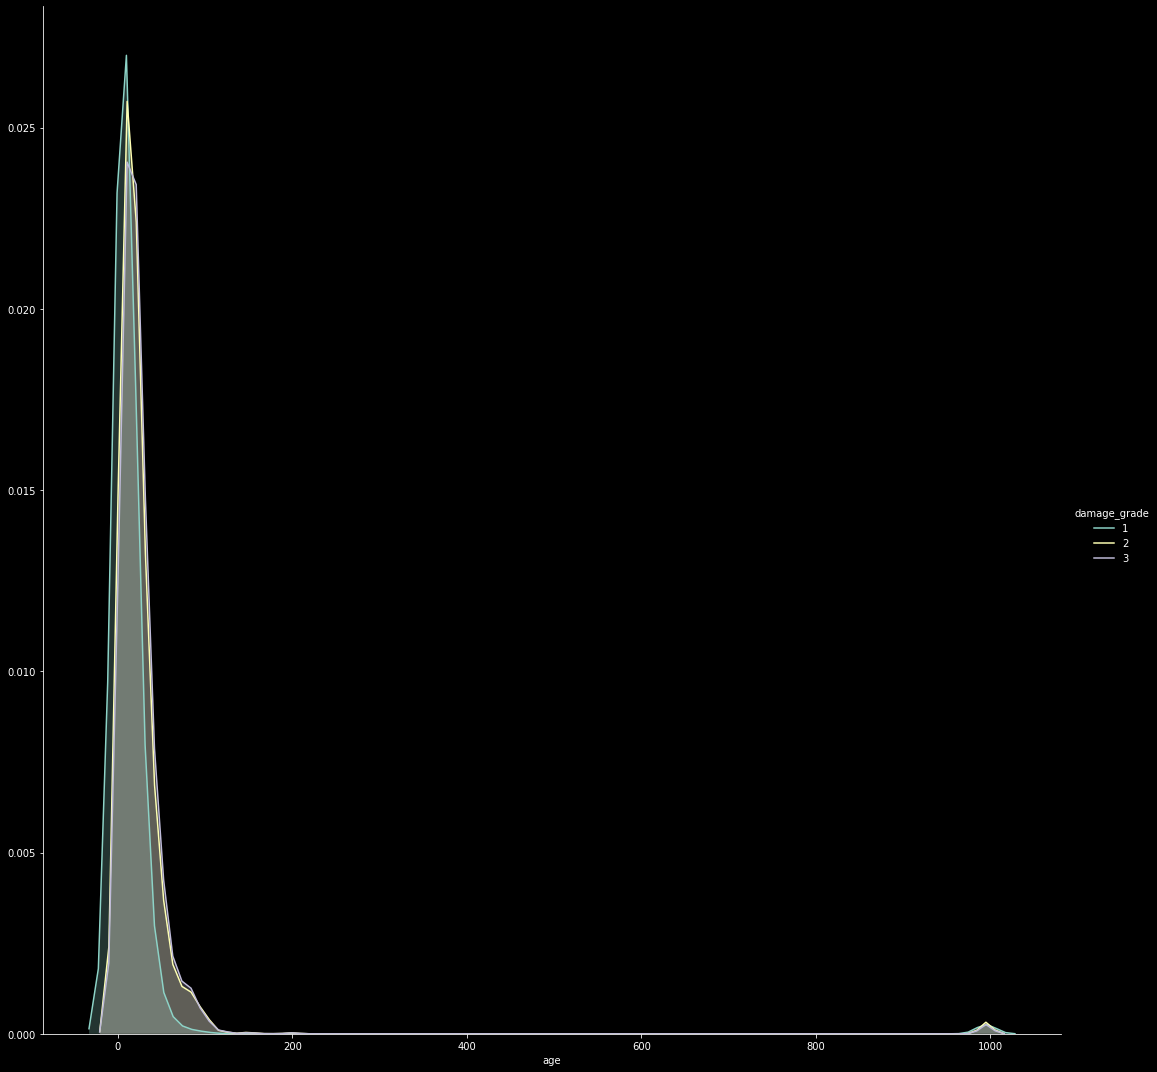

In [173]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=15)
  .map(sbn.kdeplot, 'age', shade=True)
 .add_legend()
)
(train_df.age.max(), train_df.age.mean(), train_df.age.min())


# Area Percentage vs Damage grade

(100, 8.018050583075276, 1)

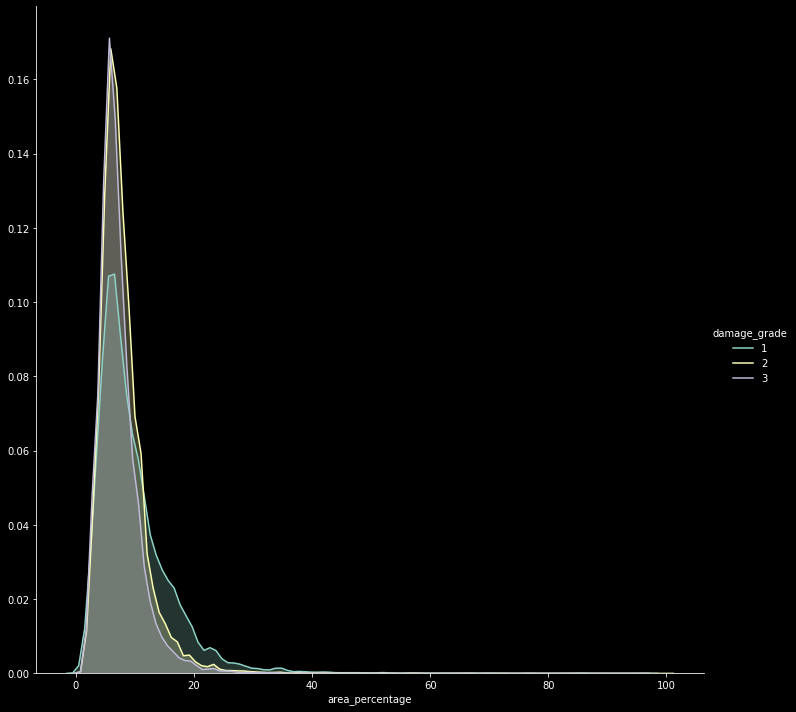

In [174]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=10)
  .map(sbn.kdeplot, 'area_percentage', shade=True)
 .add_legend()
)
(train_df.area_percentage.max(), train_df.area_percentage.mean(), train_df.area_percentage.min())


# Height percentage vs Damage grade

(32, 5.43436517895173, 2)

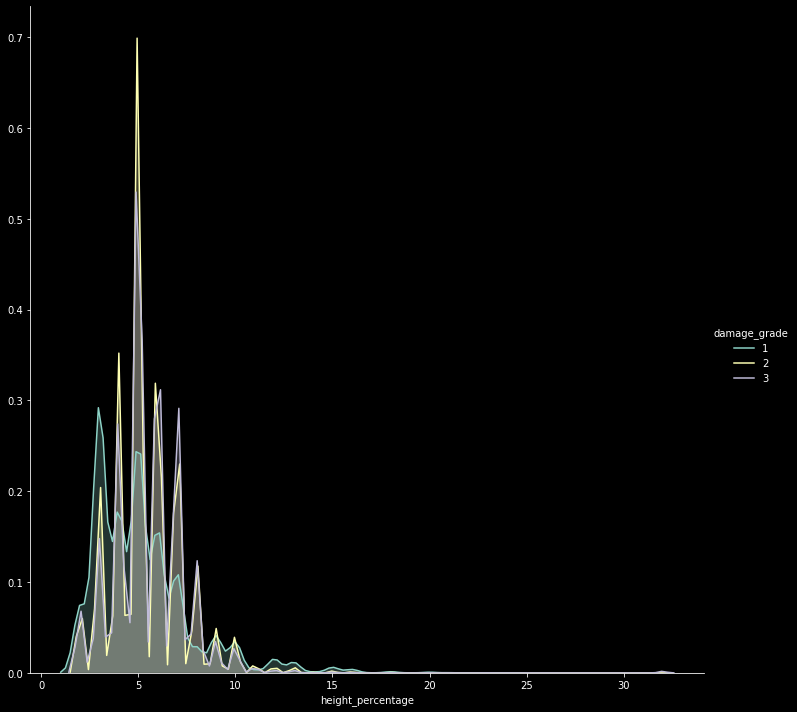

In [175]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=10)
  .map(sbn.kdeplot, 'height_percentage', shade=True)
 .add_legend()
)
(train_df.height_percentage.max(), train_df.height_percentage.mean(), train_df.height_percentage.min())


(9, 0.9839486417933929, 0)

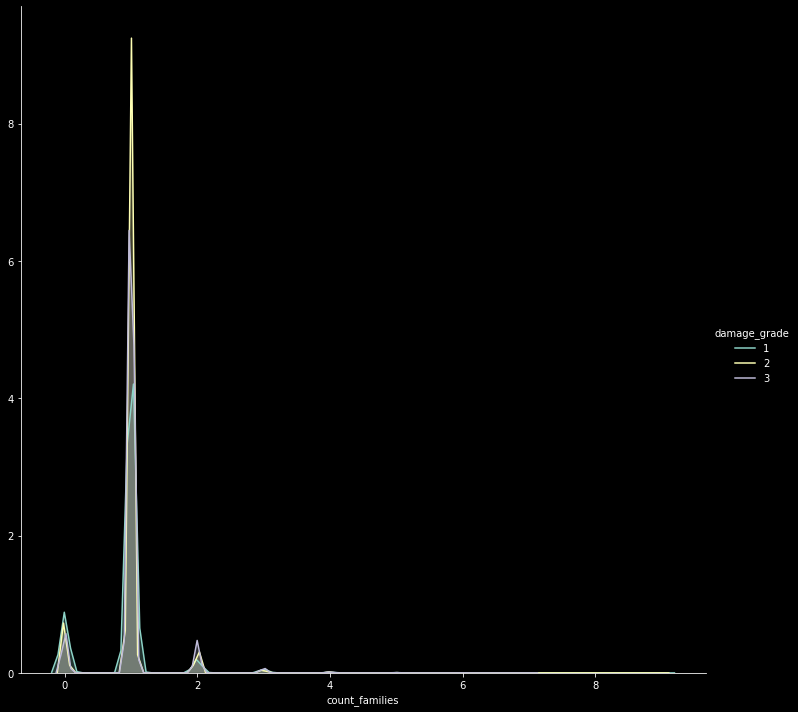

In [176]:
(sbn
  .FacetGrid(train_df, 
             hue='damage_grade',size=10)
  .map(sbn.kdeplot, 'count_families', shade=True)
 .add_legend()
)
(train_df.count_families.max(), train_df.count_families.mean(), train_df.count_families.min())


# Binary  columns vs Damage grade

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

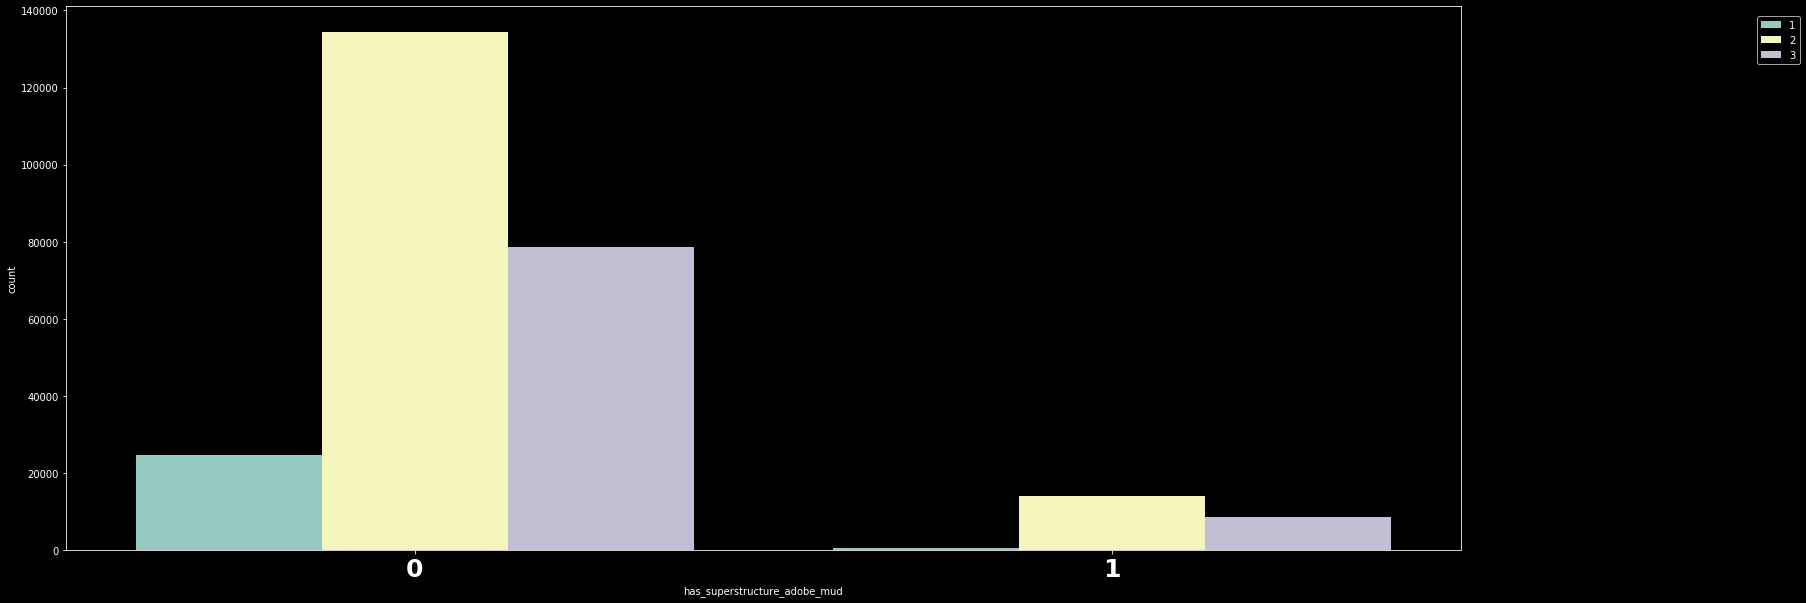

In [177]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_adobe_mud', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_adobe_mud.value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

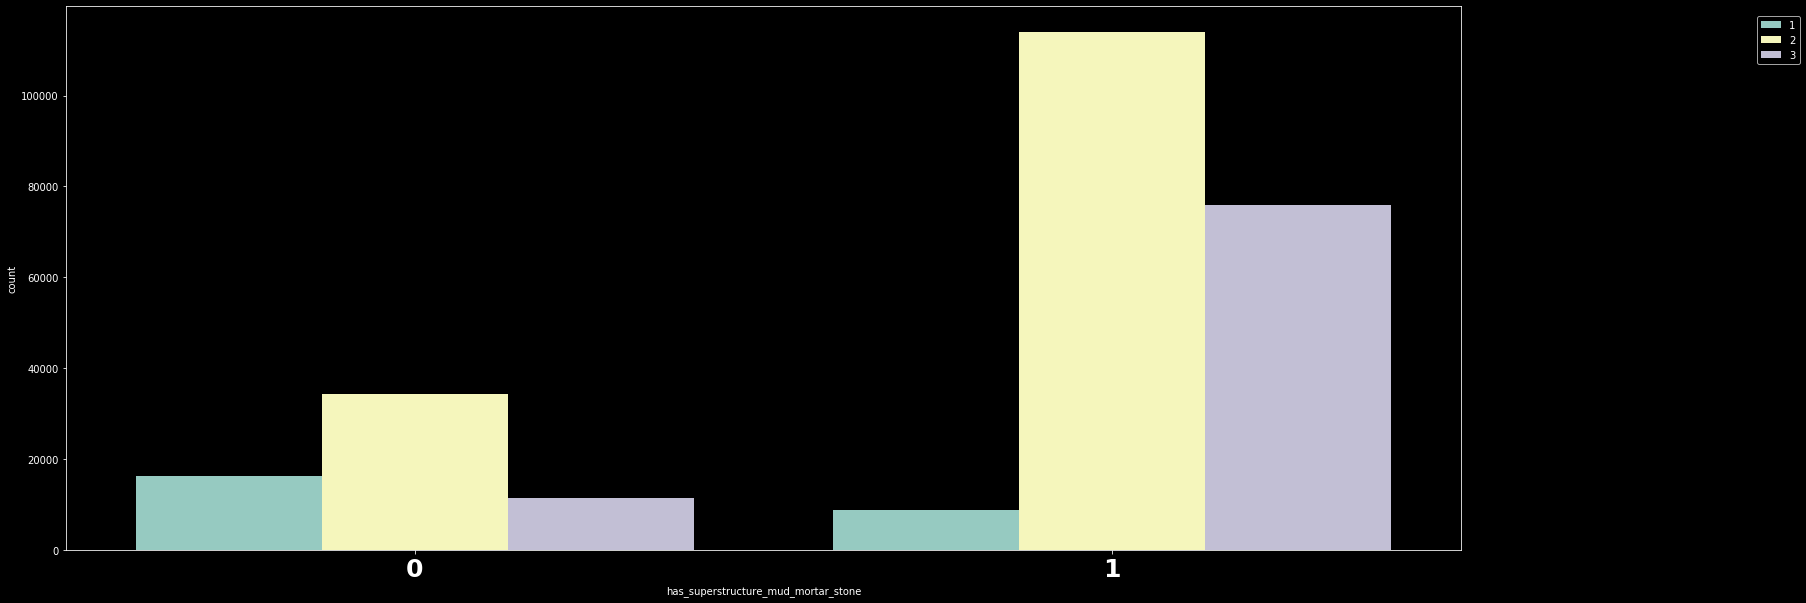

In [178]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_mud_mortar_stone', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_mud_mortar_stone.value_counts()

0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

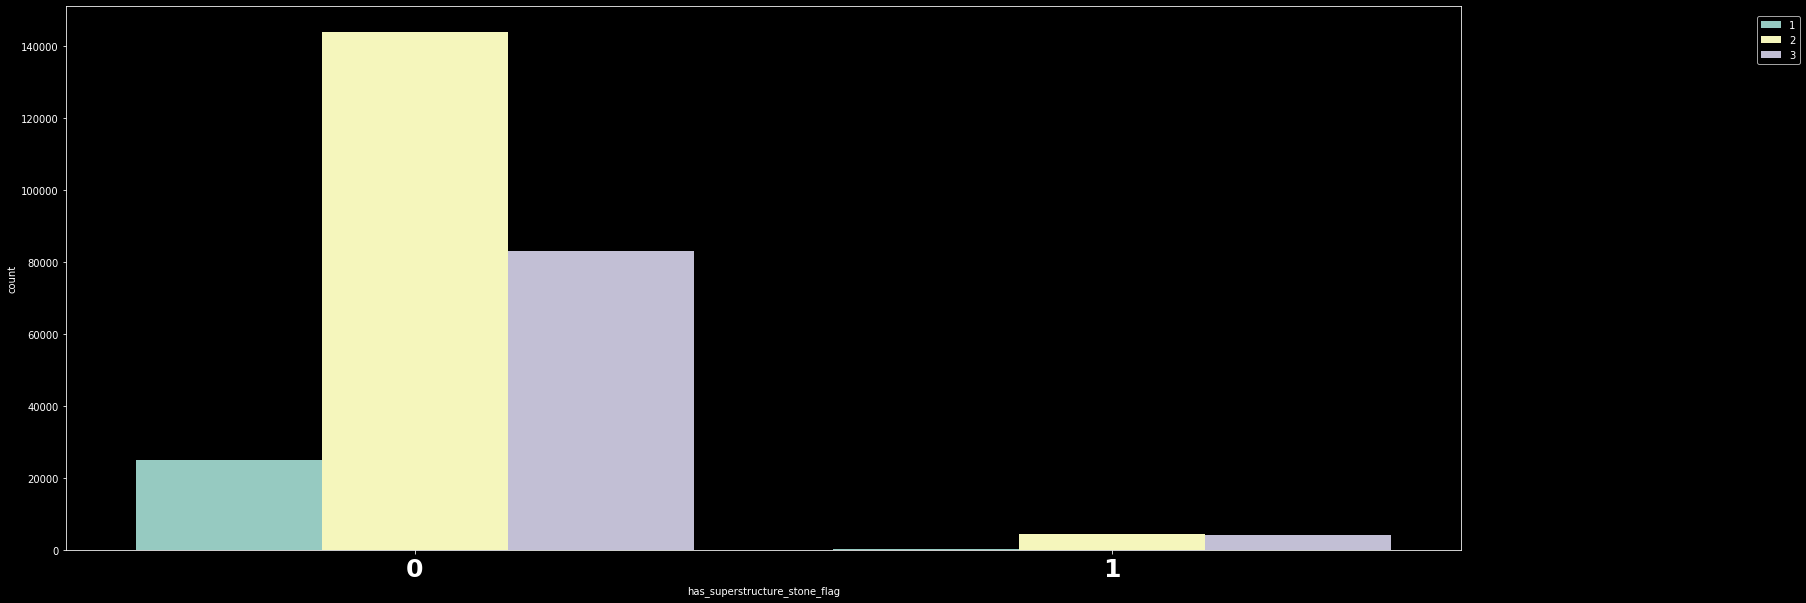

In [179]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_stone_flag', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_stone_flag.value_counts()

0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

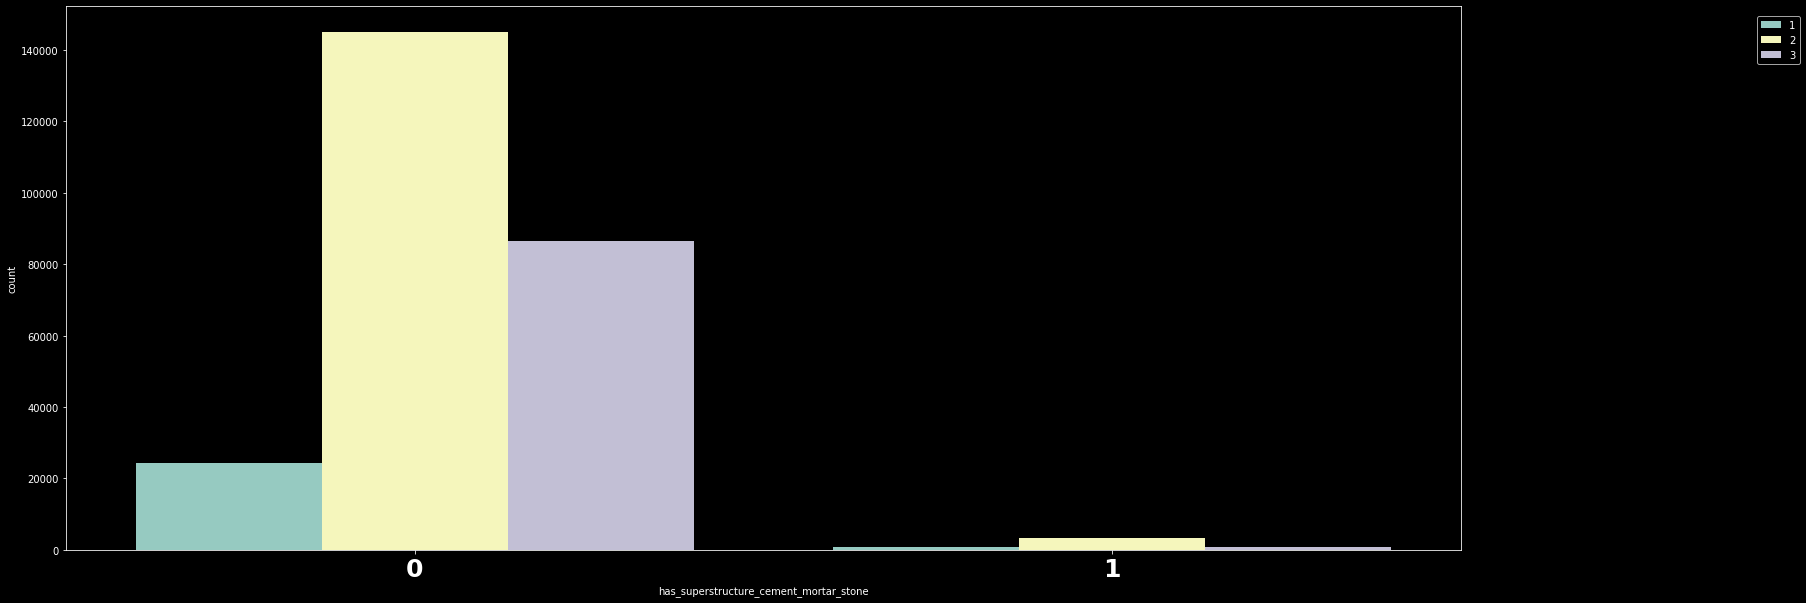

In [180]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_cement_mortar_stone', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_cement_mortar_stone.value_counts()

0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

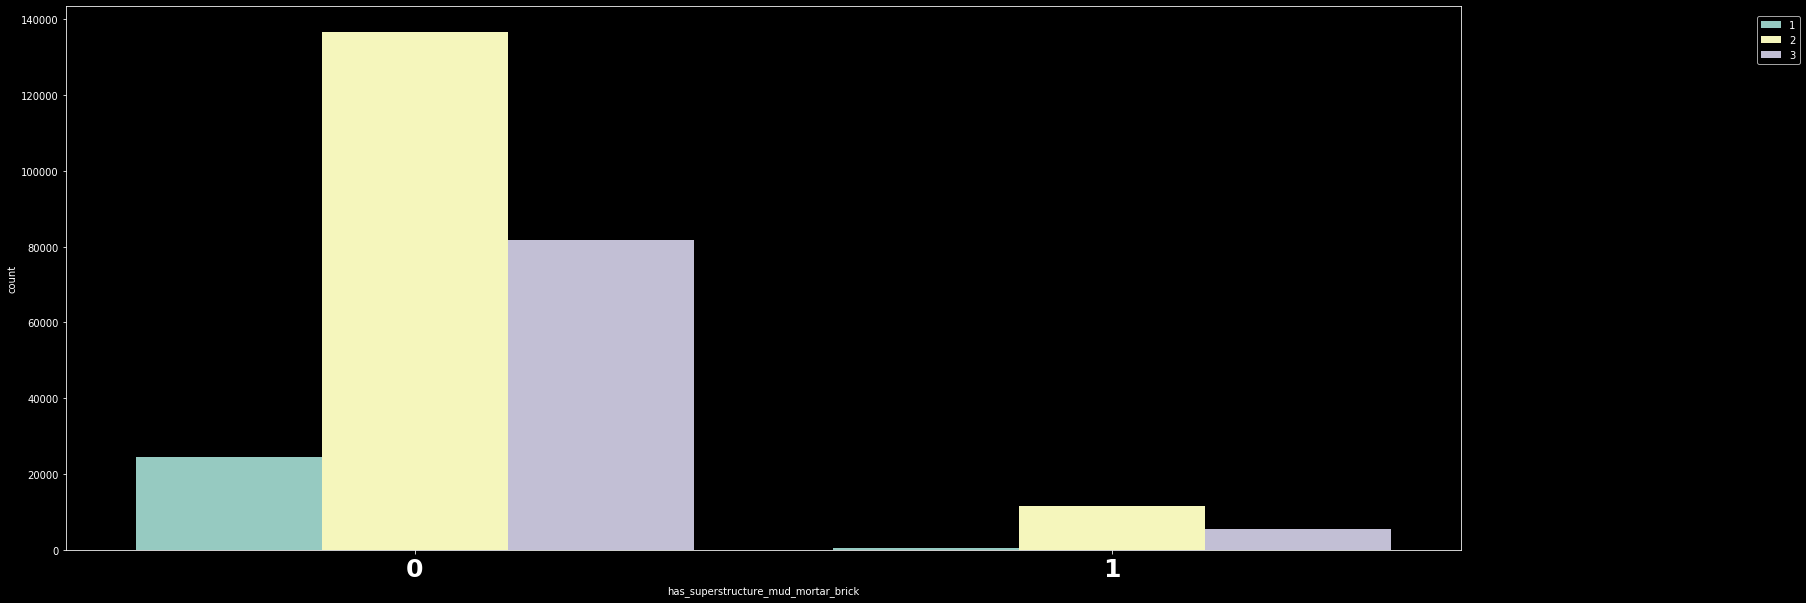

In [181]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_mud_mortar_brick', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_mud_mortar_brick.value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

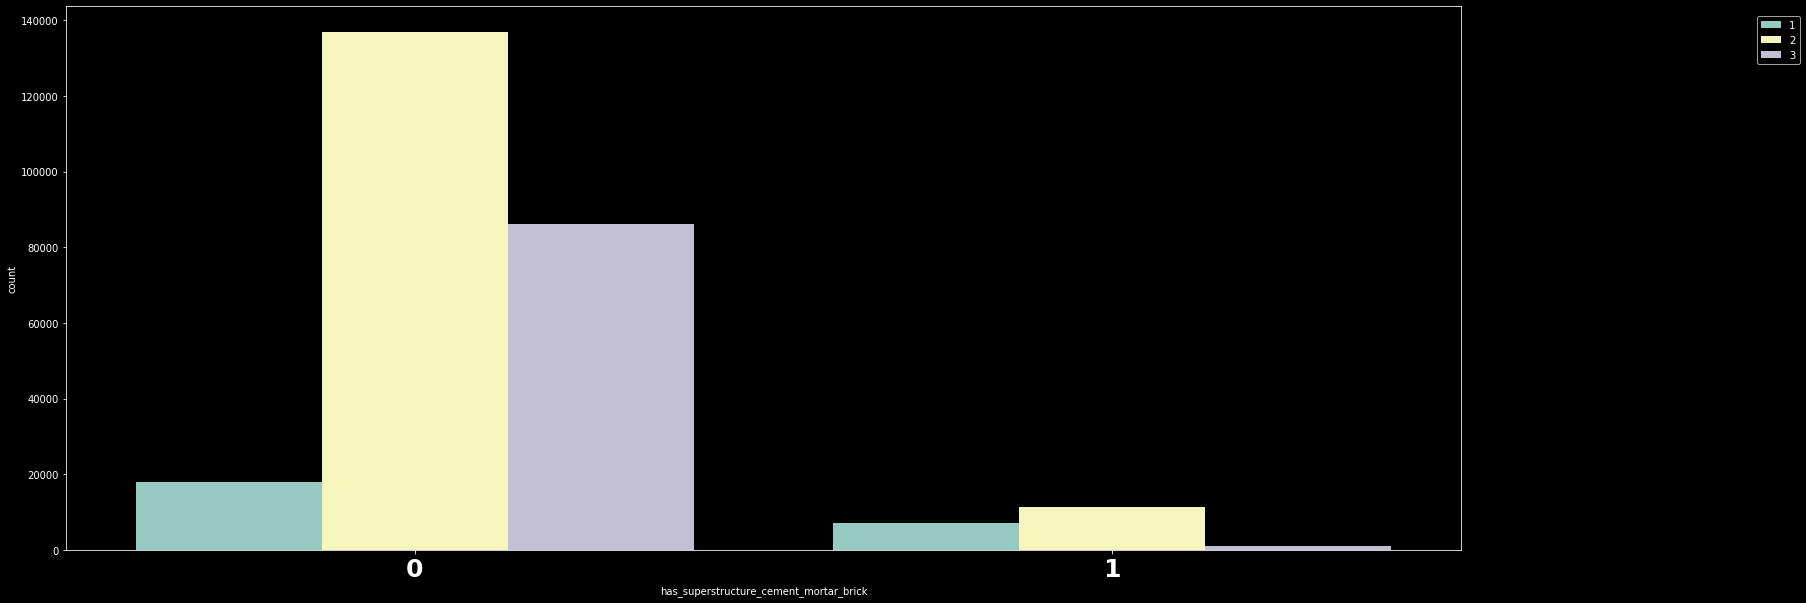

In [182]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_cement_mortar_brick', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_cement_mortar_brick.value_counts()

0    194151
1     66450
Name: has_superstructure_timber, dtype: int64

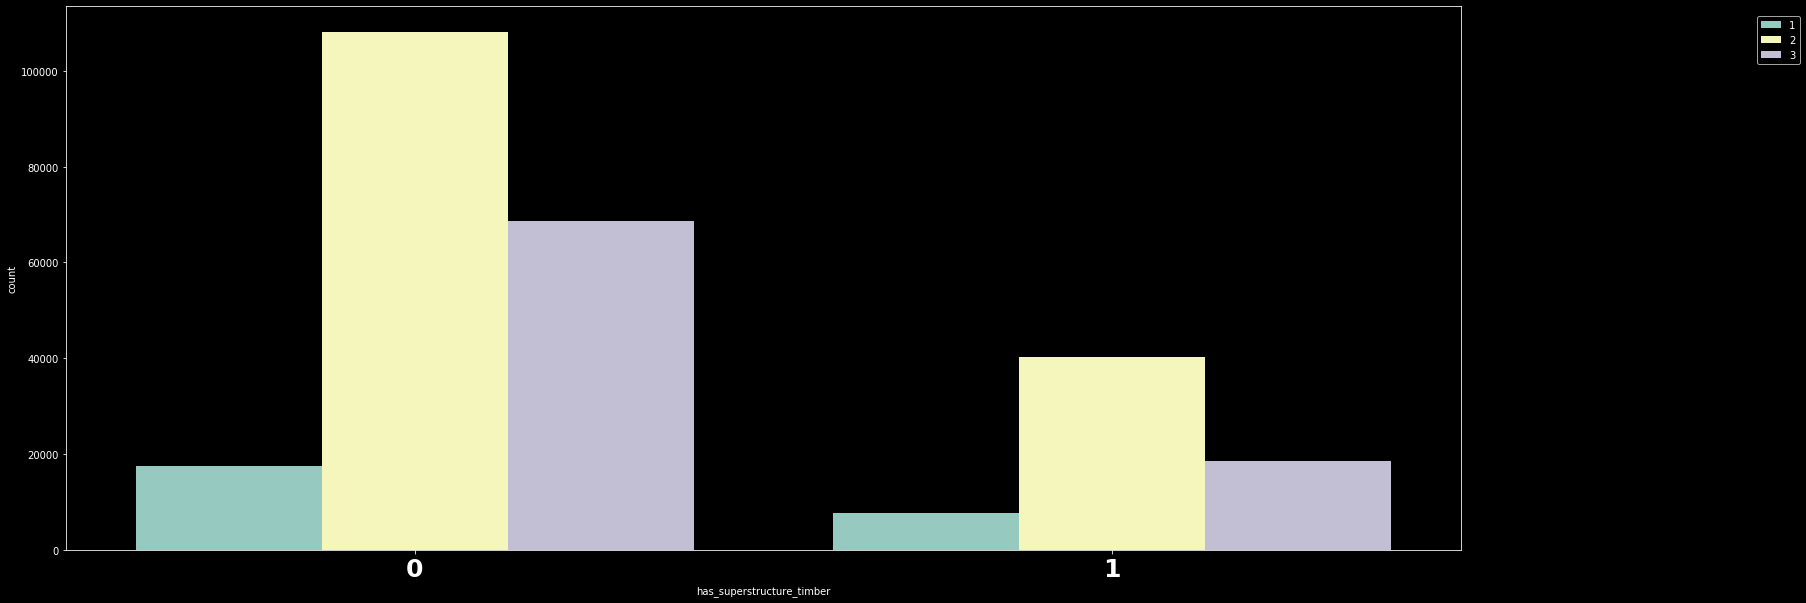

In [183]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_timber', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_timber.value_counts()

0    238447
1     22154
Name: has_superstructure_bamboo, dtype: int64

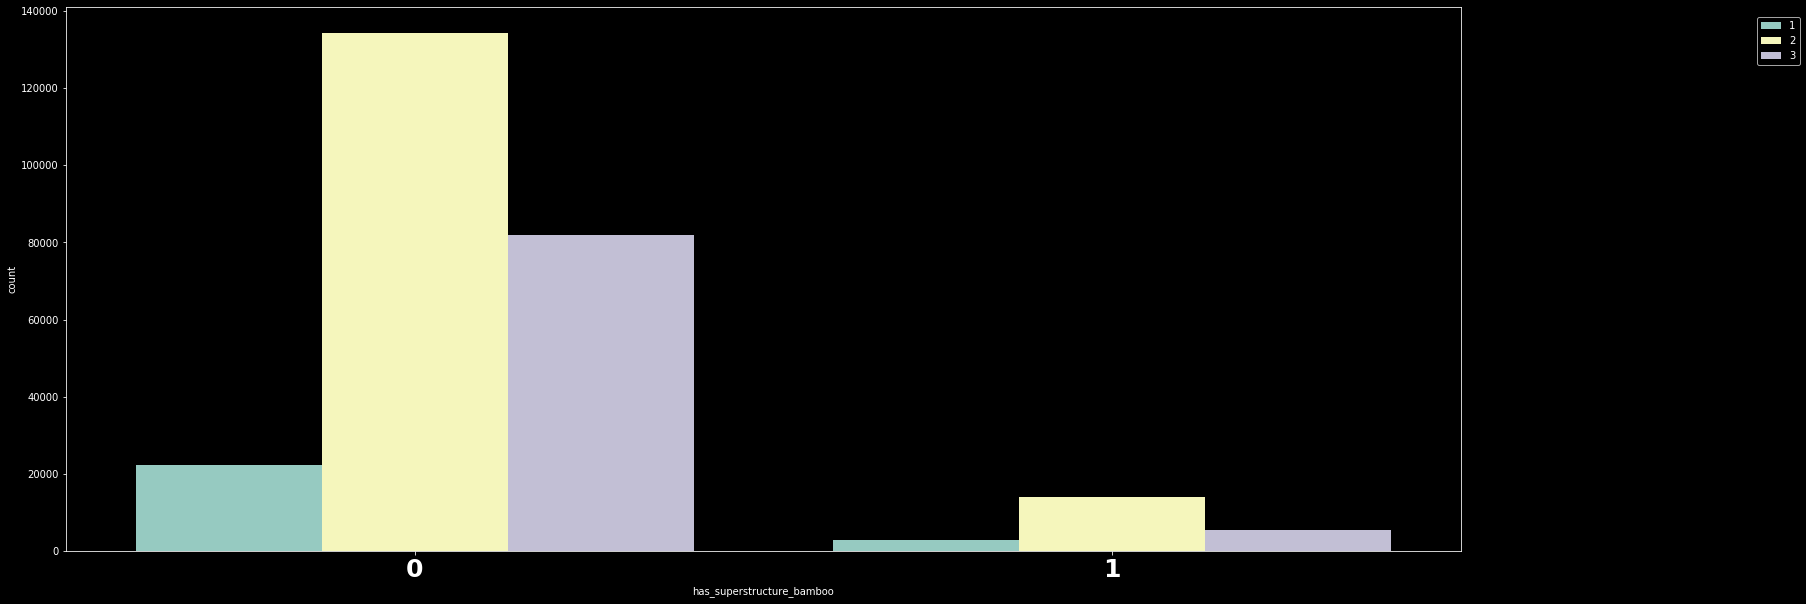

In [184]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_bamboo', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_bamboo.value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

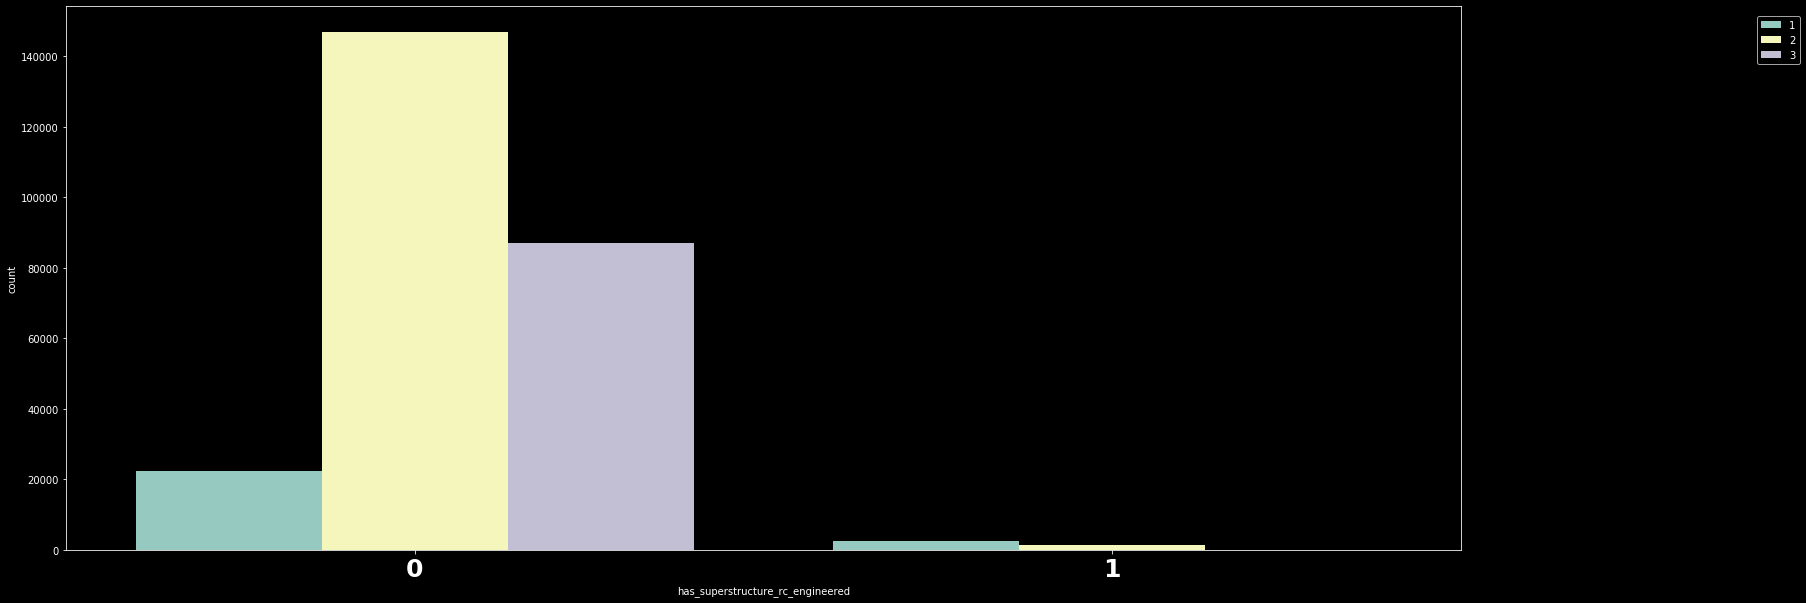

In [185]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_rc_engineered', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_rc_engineered.value_counts()

0    249502
1     11099
Name: has_superstructure_rc_non_engineered, dtype: int64

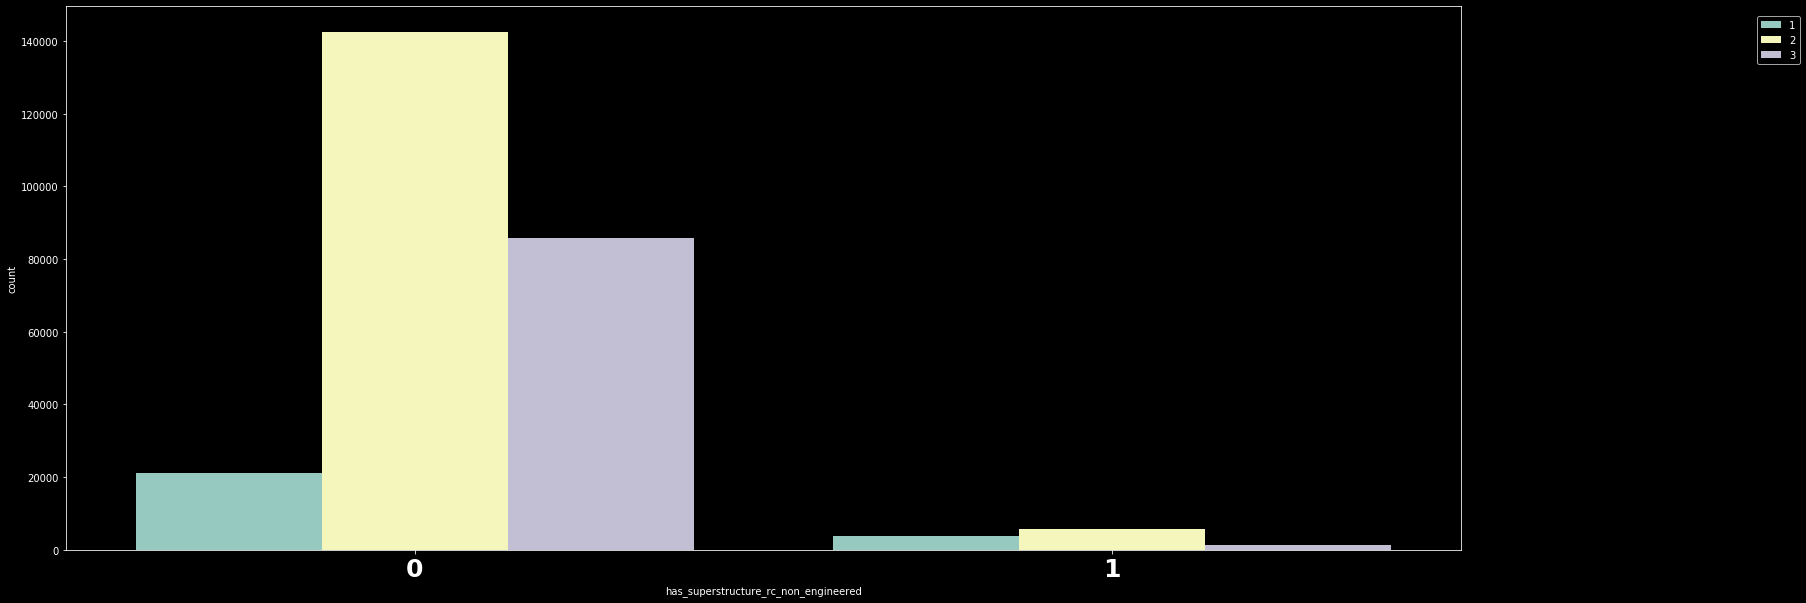

In [186]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_rc_non_engineered', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_rc_non_engineered.value_counts()

0    256696
1      3905
Name: has_superstructure_other, dtype: int64

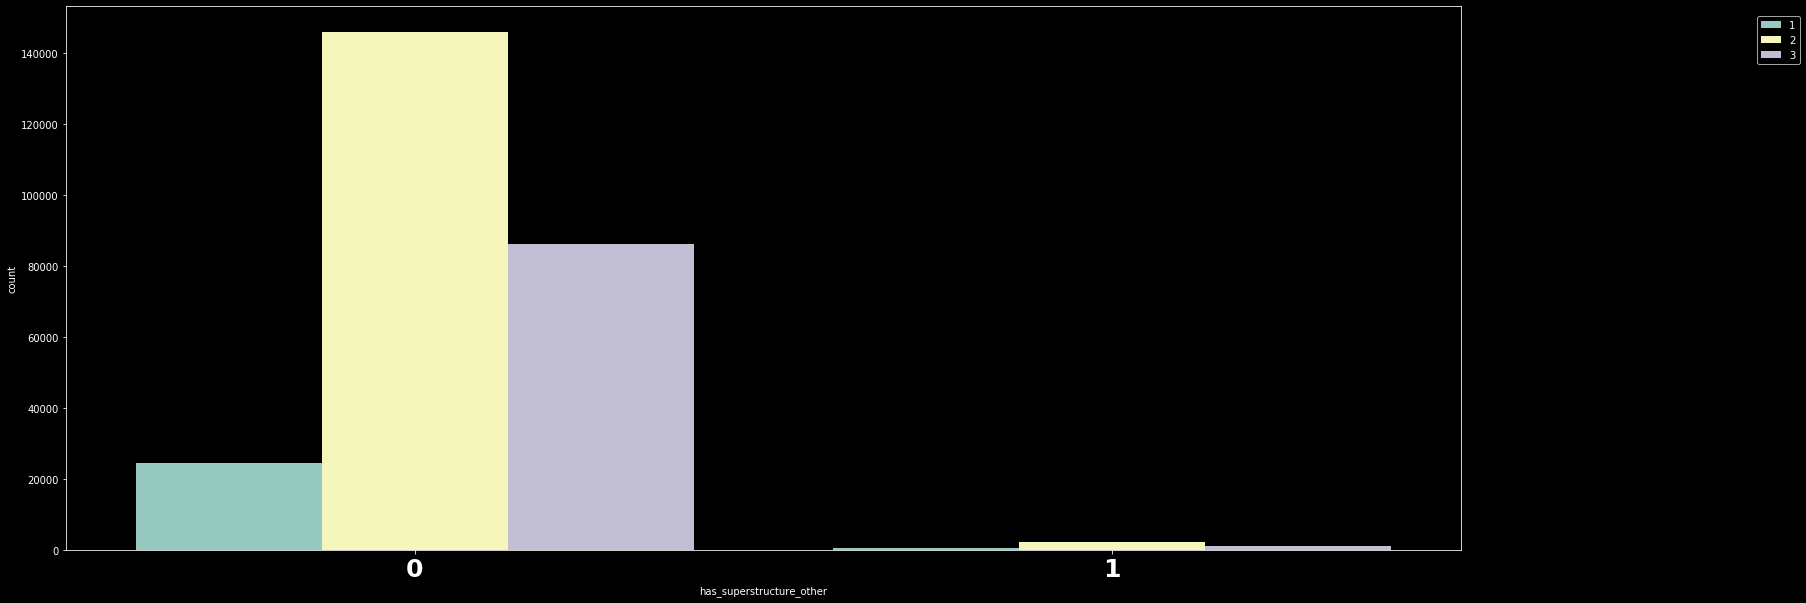

In [187]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_superstructure_other', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_superstructure_other.value_counts()

0    231445
1     29156
Name: has_secondary_use, dtype: int64

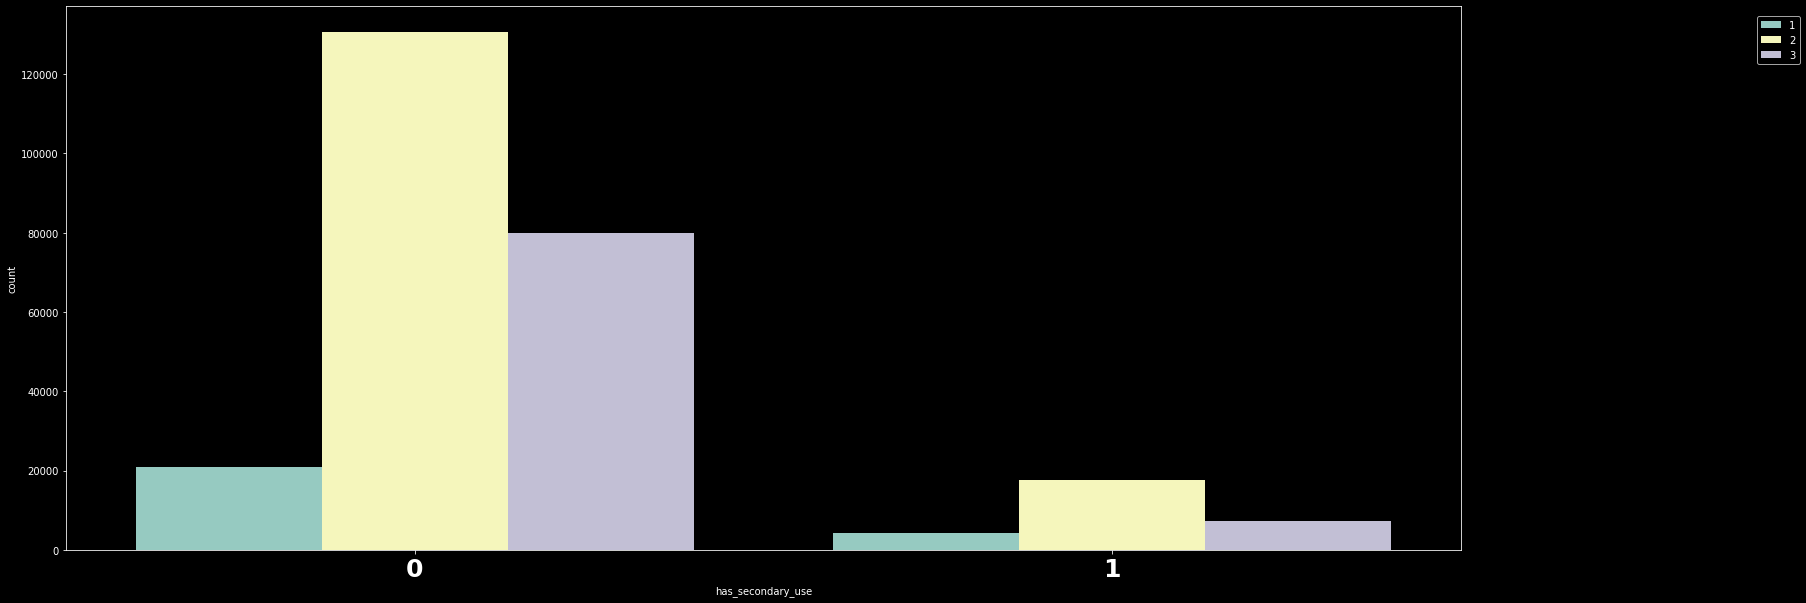

In [188]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use.value_counts()

0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64

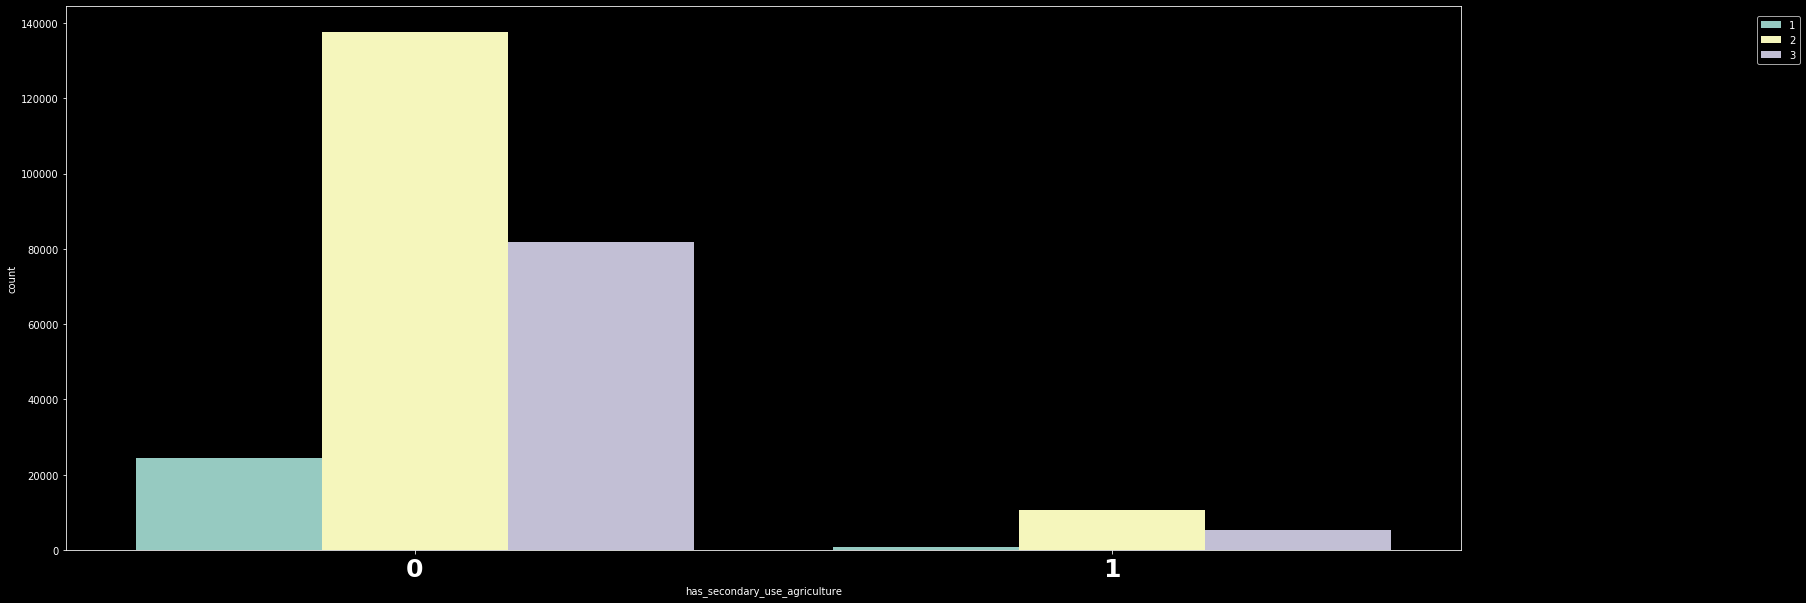

In [189]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_agriculture', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_agriculture.value_counts()

0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64

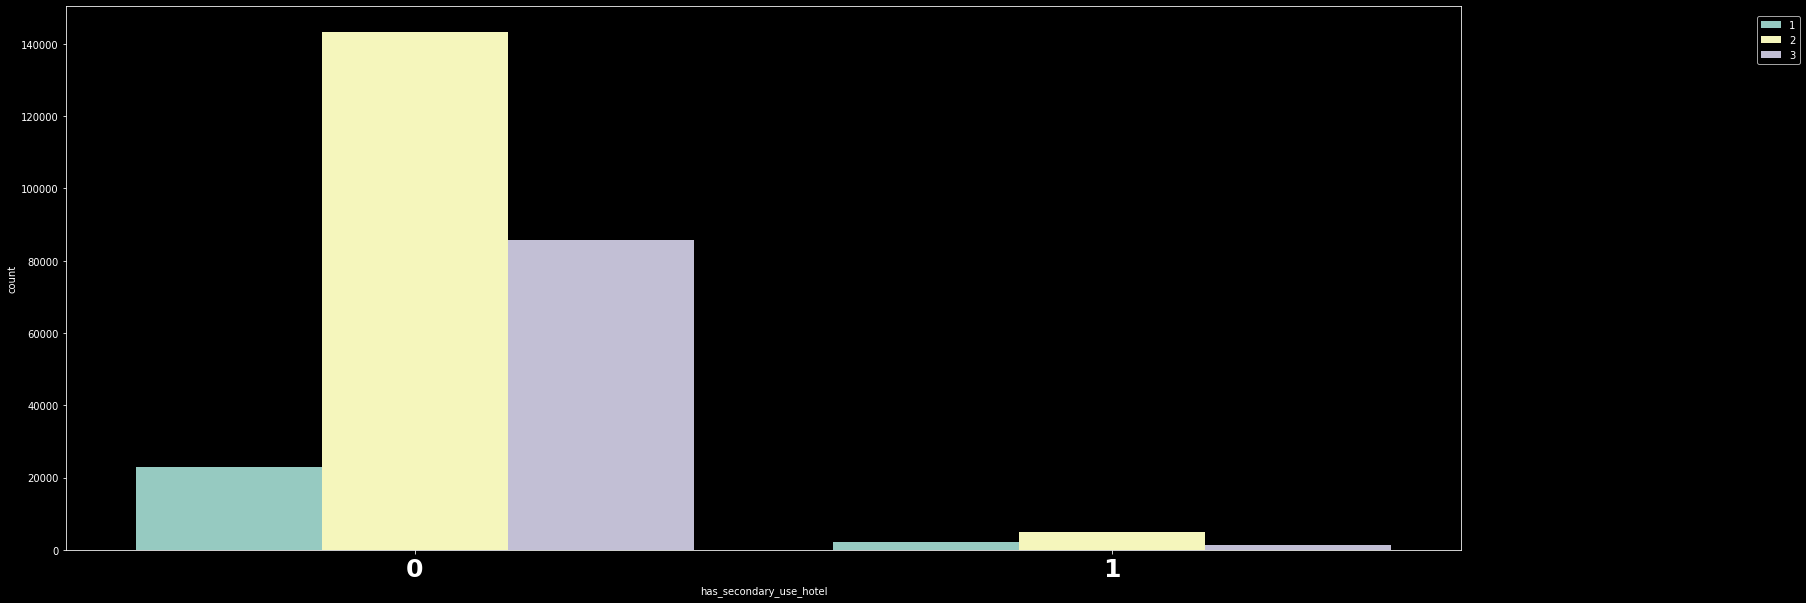

In [190]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_hotel', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_hotel.value_counts()

0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64

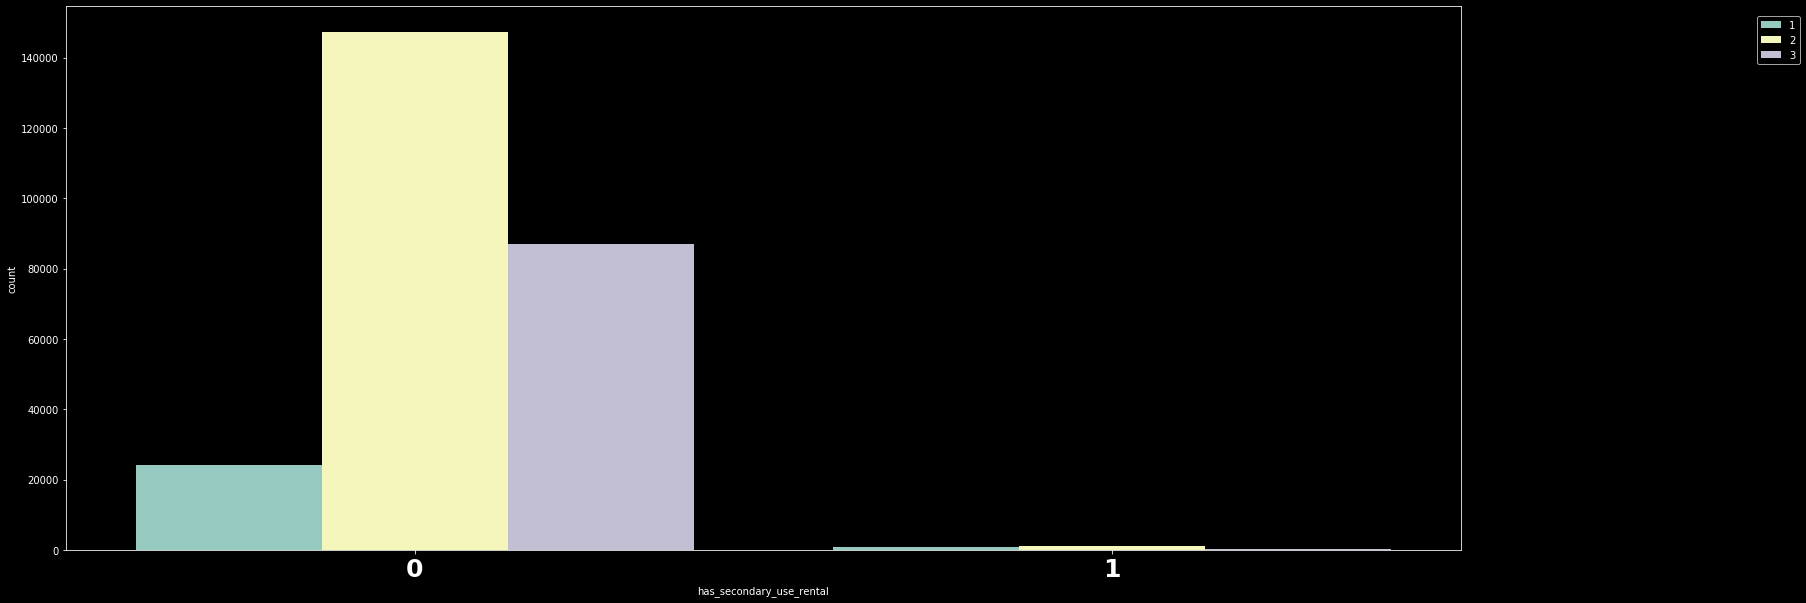

In [191]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_rental', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_rental.value_counts()

0    260356
1       245
Name: has_secondary_use_institution, dtype: int64

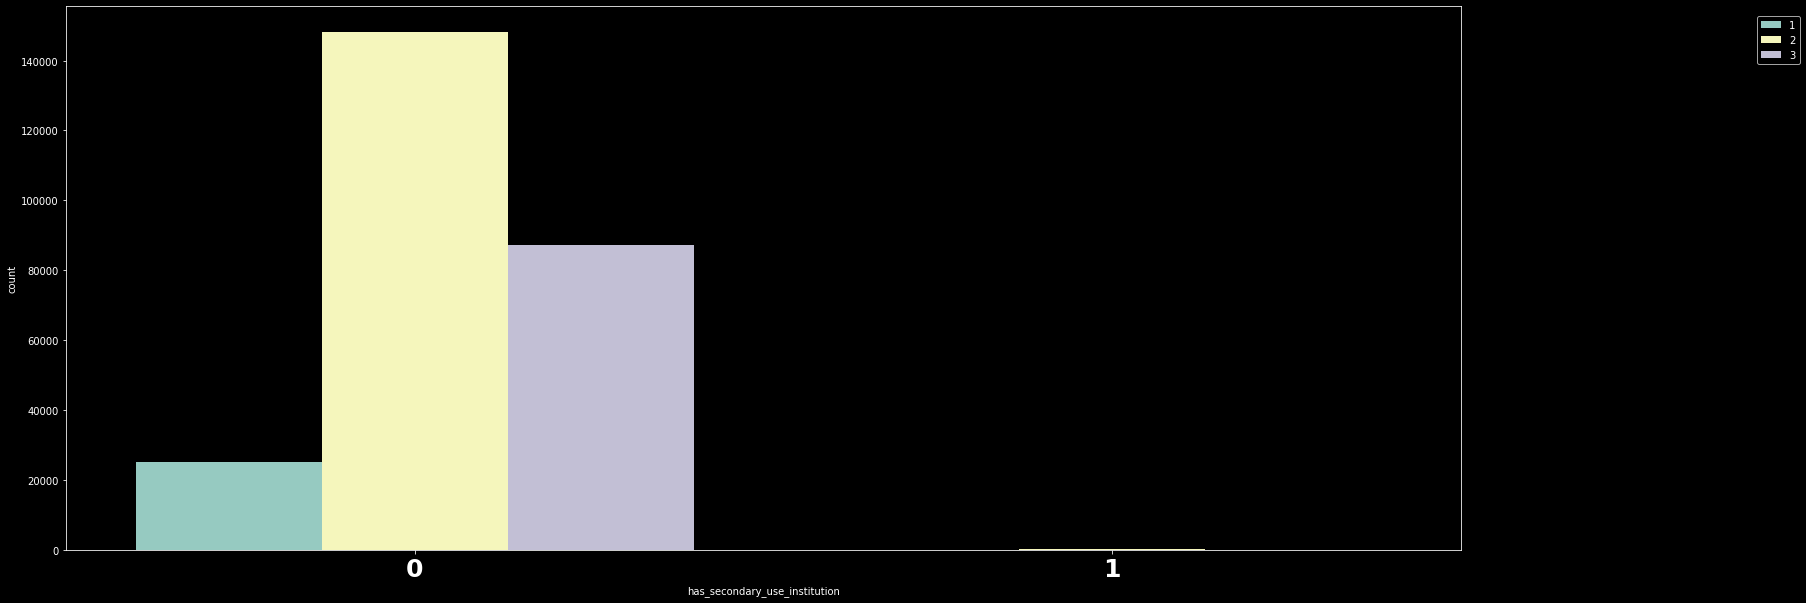

In [192]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_institution', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_institution.value_counts()

0    260507
1        94
Name: has_secondary_use_school, dtype: int64

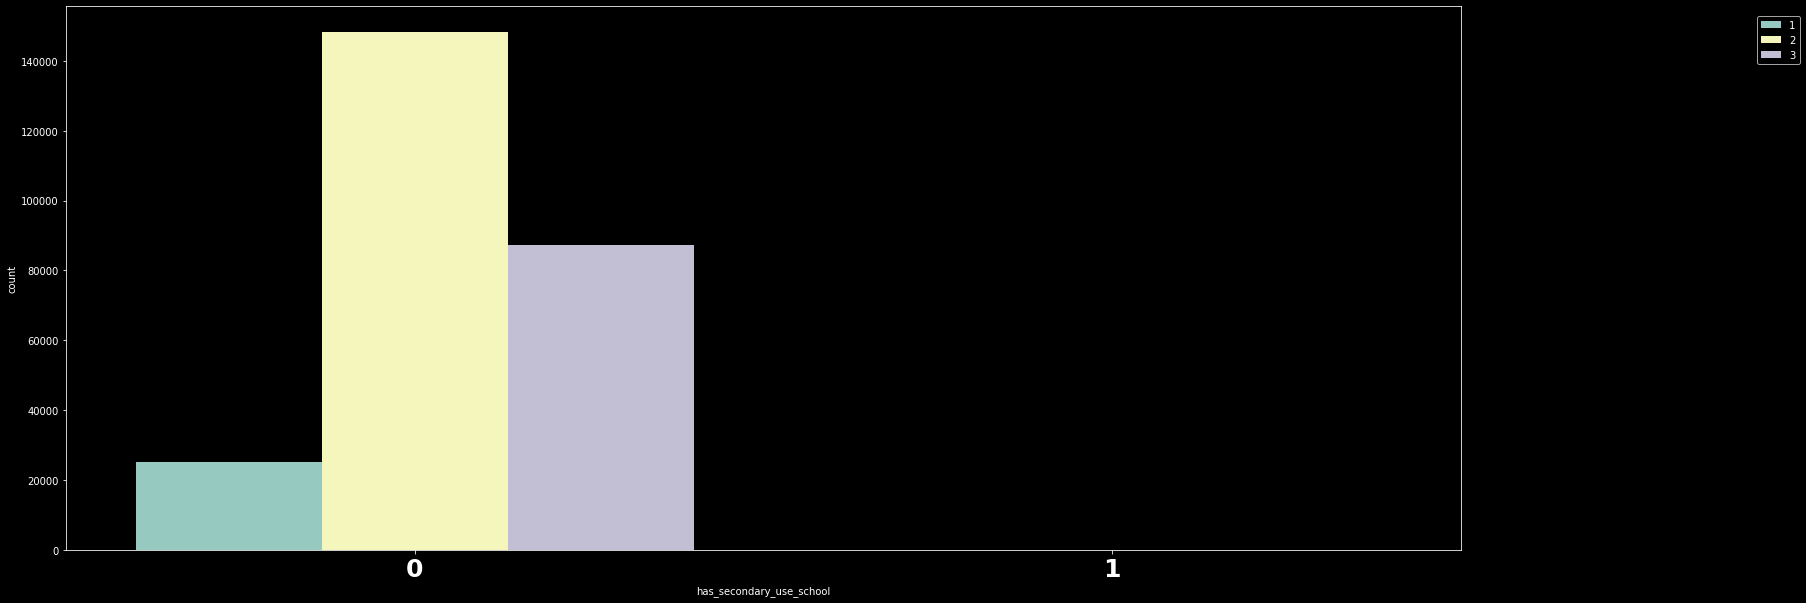

In [193]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_school', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_school.value_counts()

0    260322
1       279
Name: has_secondary_use_industry, dtype: int64

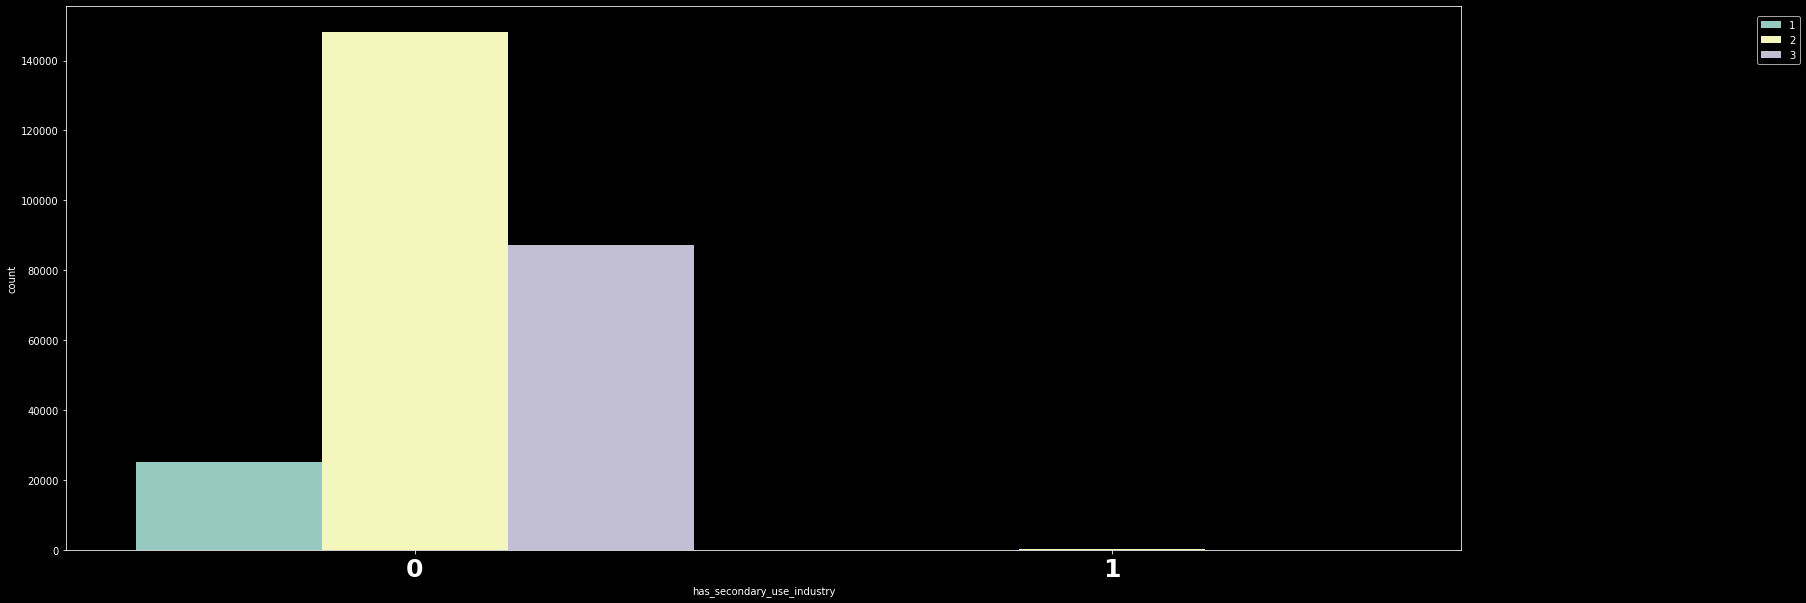

In [194]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_industry', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_industry.value_counts()

0    260552
1        49
Name: has_secondary_use_health_post, dtype: int64

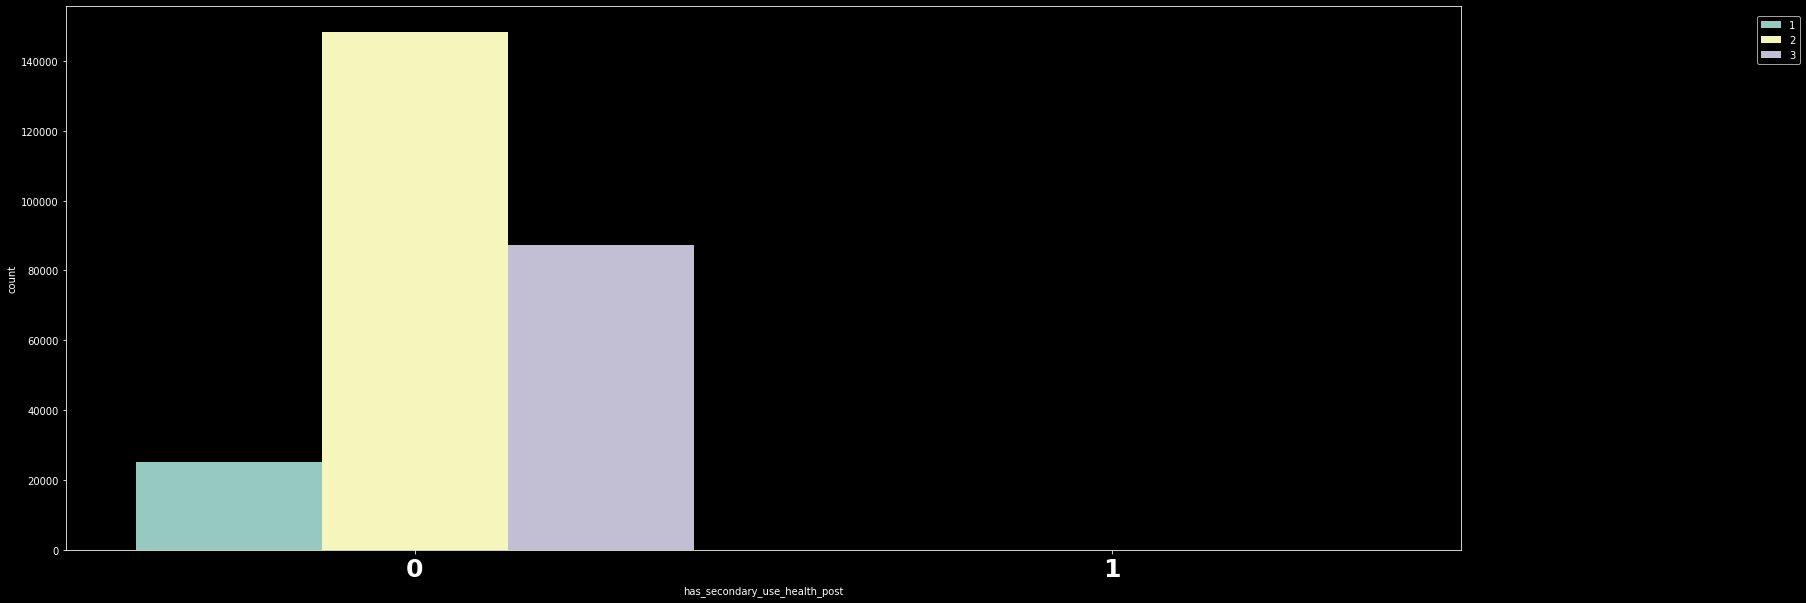

In [195]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_health_post', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_health_post.value_counts()

0    260563
1        38
Name: has_secondary_use_gov_office, dtype: int64

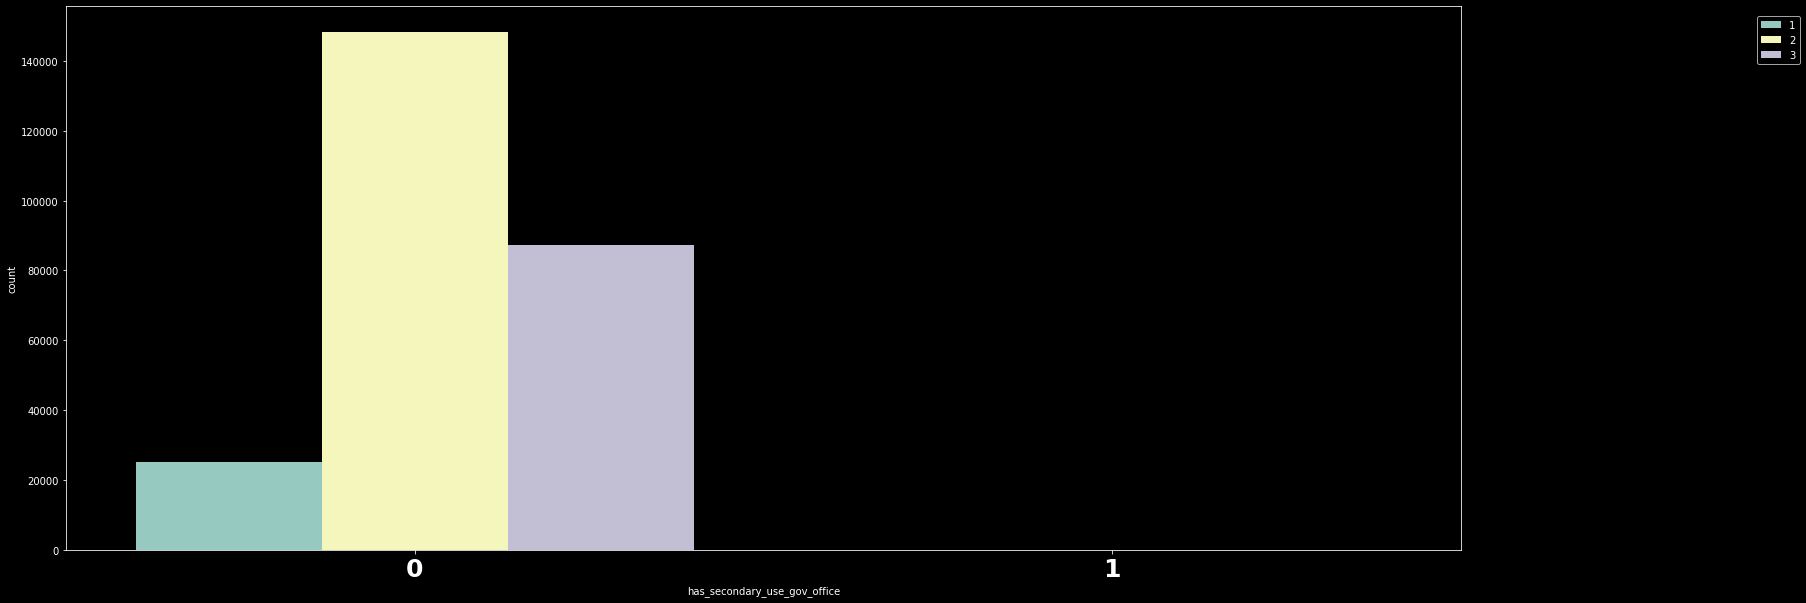

In [196]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_gov_office', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_gov_office.value_counts()

0    260578
1        23
Name: has_secondary_use_use_police, dtype: int64

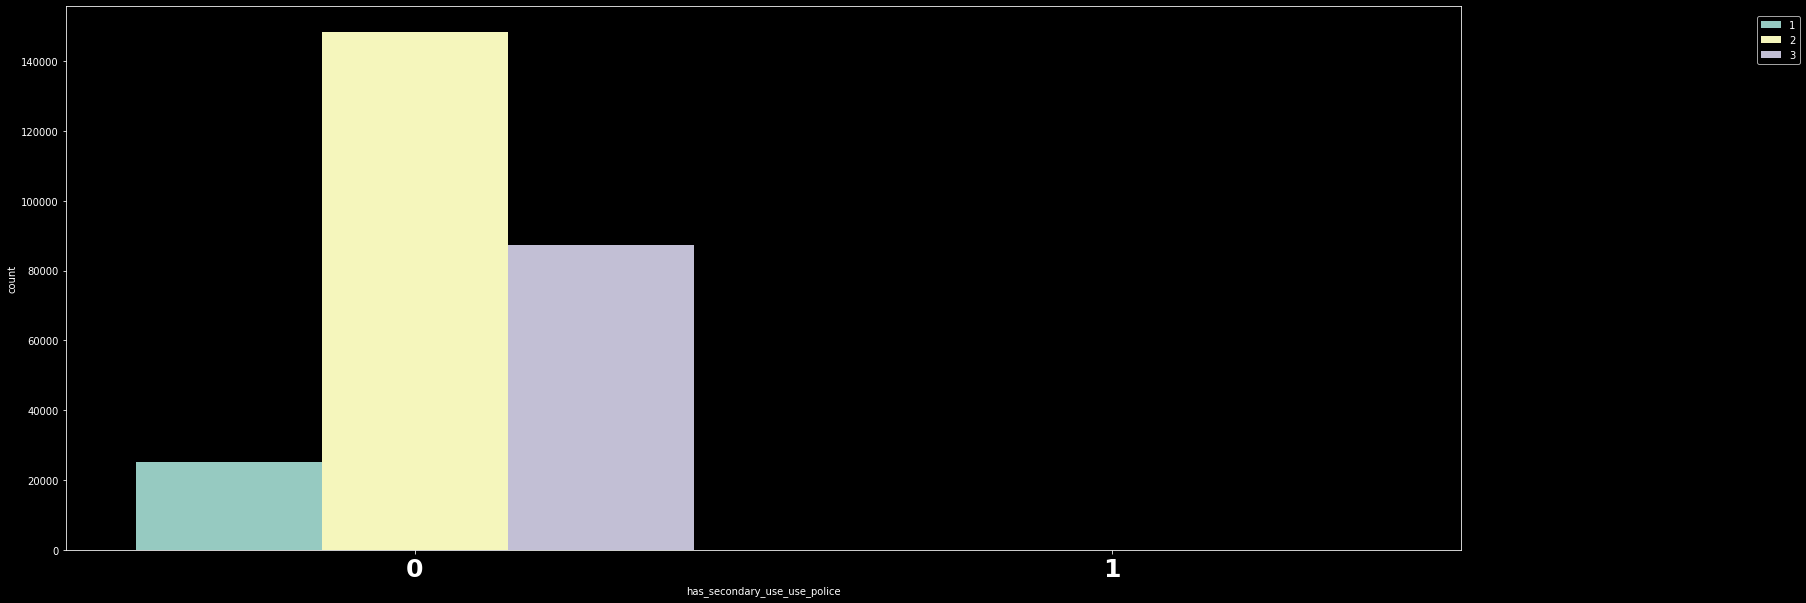

In [197]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_use_police', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_use_police.value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

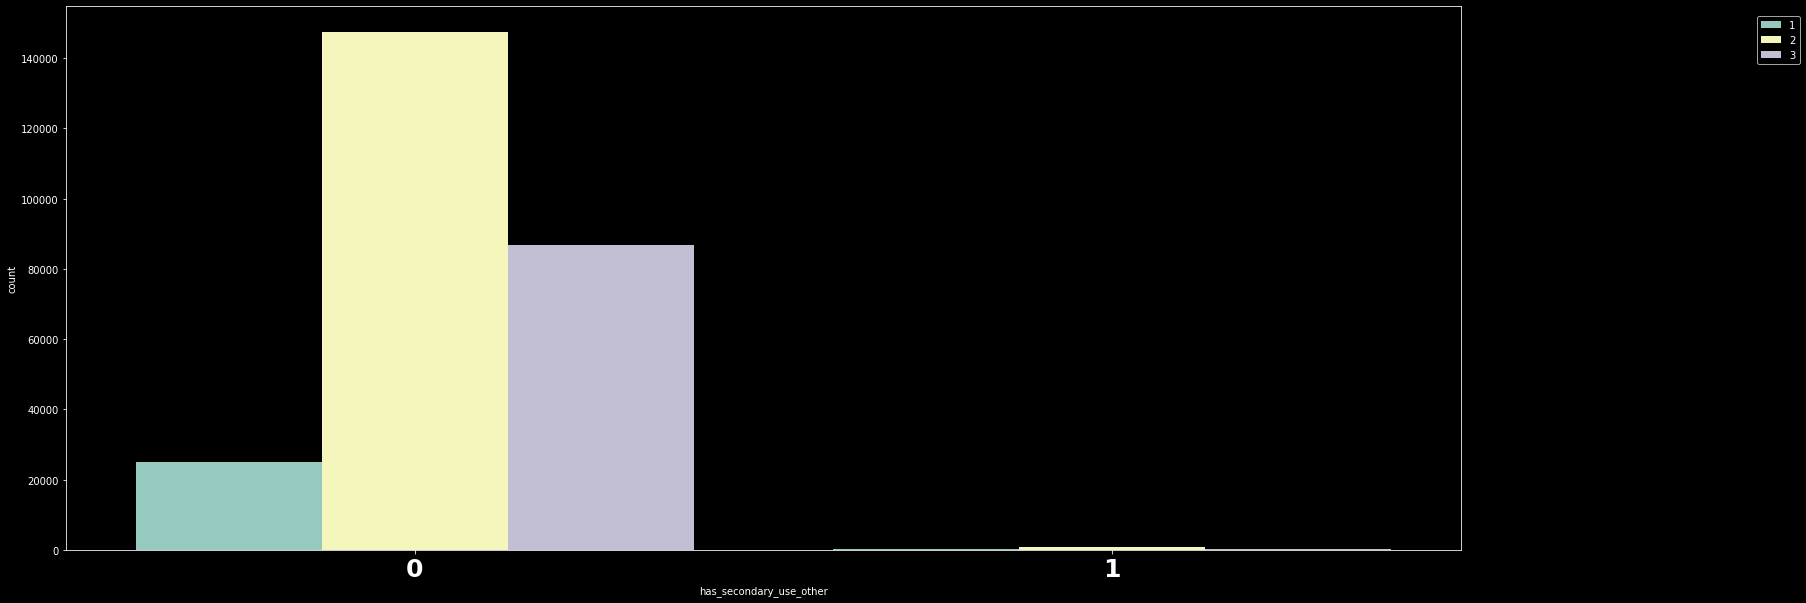

In [198]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='has_secondary_use_other', hue='damage_grade')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_other.value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

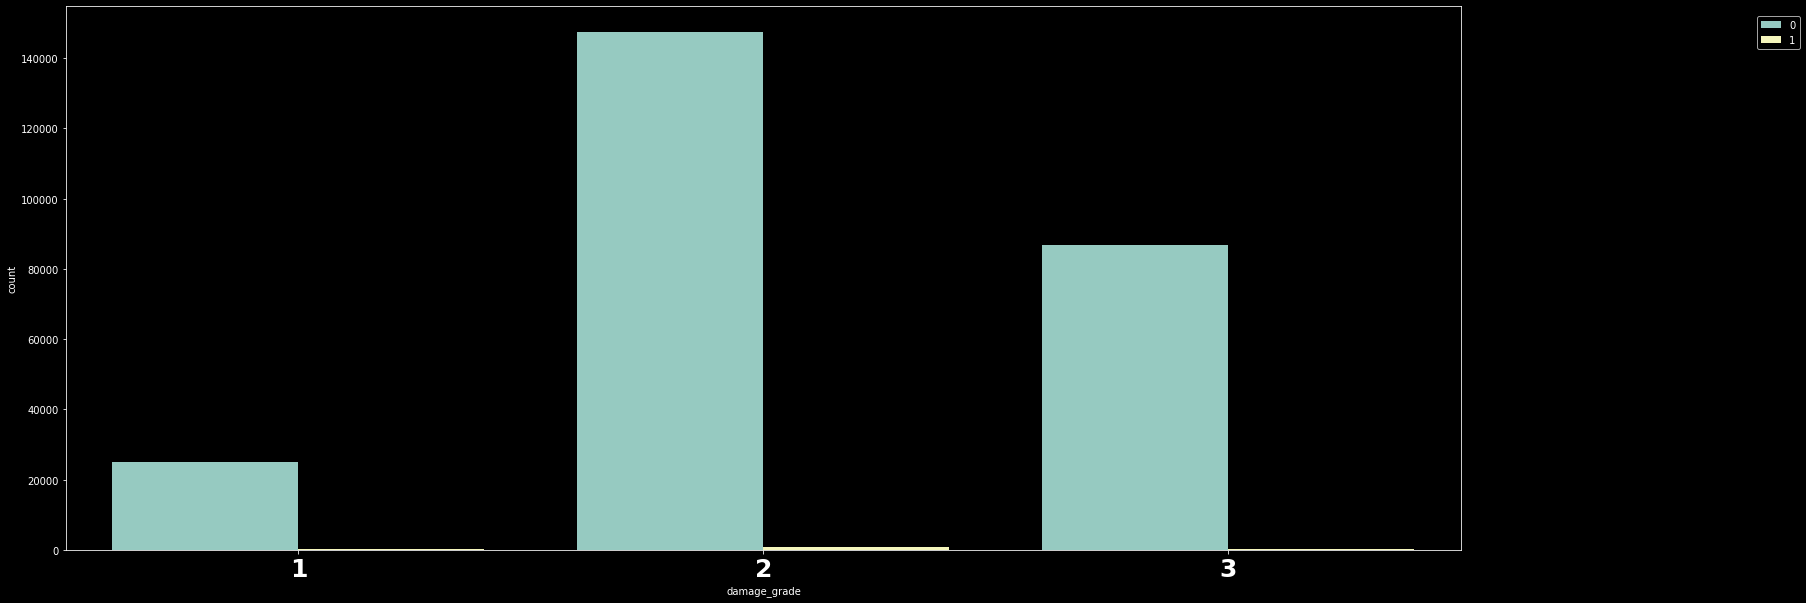

In [199]:
plt.figure(figsize=(25, 10))
plot = sbn.countplot(data=train_df, x='damage_grade', hue='has_secondary_use_other')
plot.set_xticklabels(labels=plot.get_xticklabels(), fontweight='bold', fontsize=25)
plt.legend(bbox_to_anchor=(1.25, 1), loc=1, borderaxespad=01.0)
train_df.has_secondary_use_other.value_counts()